In [1]:
!nvidia-smi
!pip install ultralytics

Sat Apr  6 07:02:35 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   52C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
from ultralytics import YOLO

import os

from IPython.display import display, Image

from IPython import display

from IPython.display import clear_output

clear_output()

yolo_mode = "checks"

In [2]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="9ULgYrCdtVhfxVKFaTUc")
project = rf.workspace("chilli-8e54f").project("red-chilli")
version = project.version(1)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.1.43, to fix: `pip install ultralytics==8.0.196`


In [3]:
dataset.location

'/content/Red-Chilli-1'

In [ ]:
!yolo task=detect mode=train model=yolov8m.pt data={dataset.location}/data.yaml epochs=25 imgsz=600 batch=32

100% 49.7M/49.7M [00:00<00:00, 288MB/s]
Ultralytics YOLOv8.1.43 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/Red-Chilli-1/data.yaml, epochs=25, time=None, patience=100, batch=32, imgsz=600, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=F

In [ ]:
from IPython.display import Image


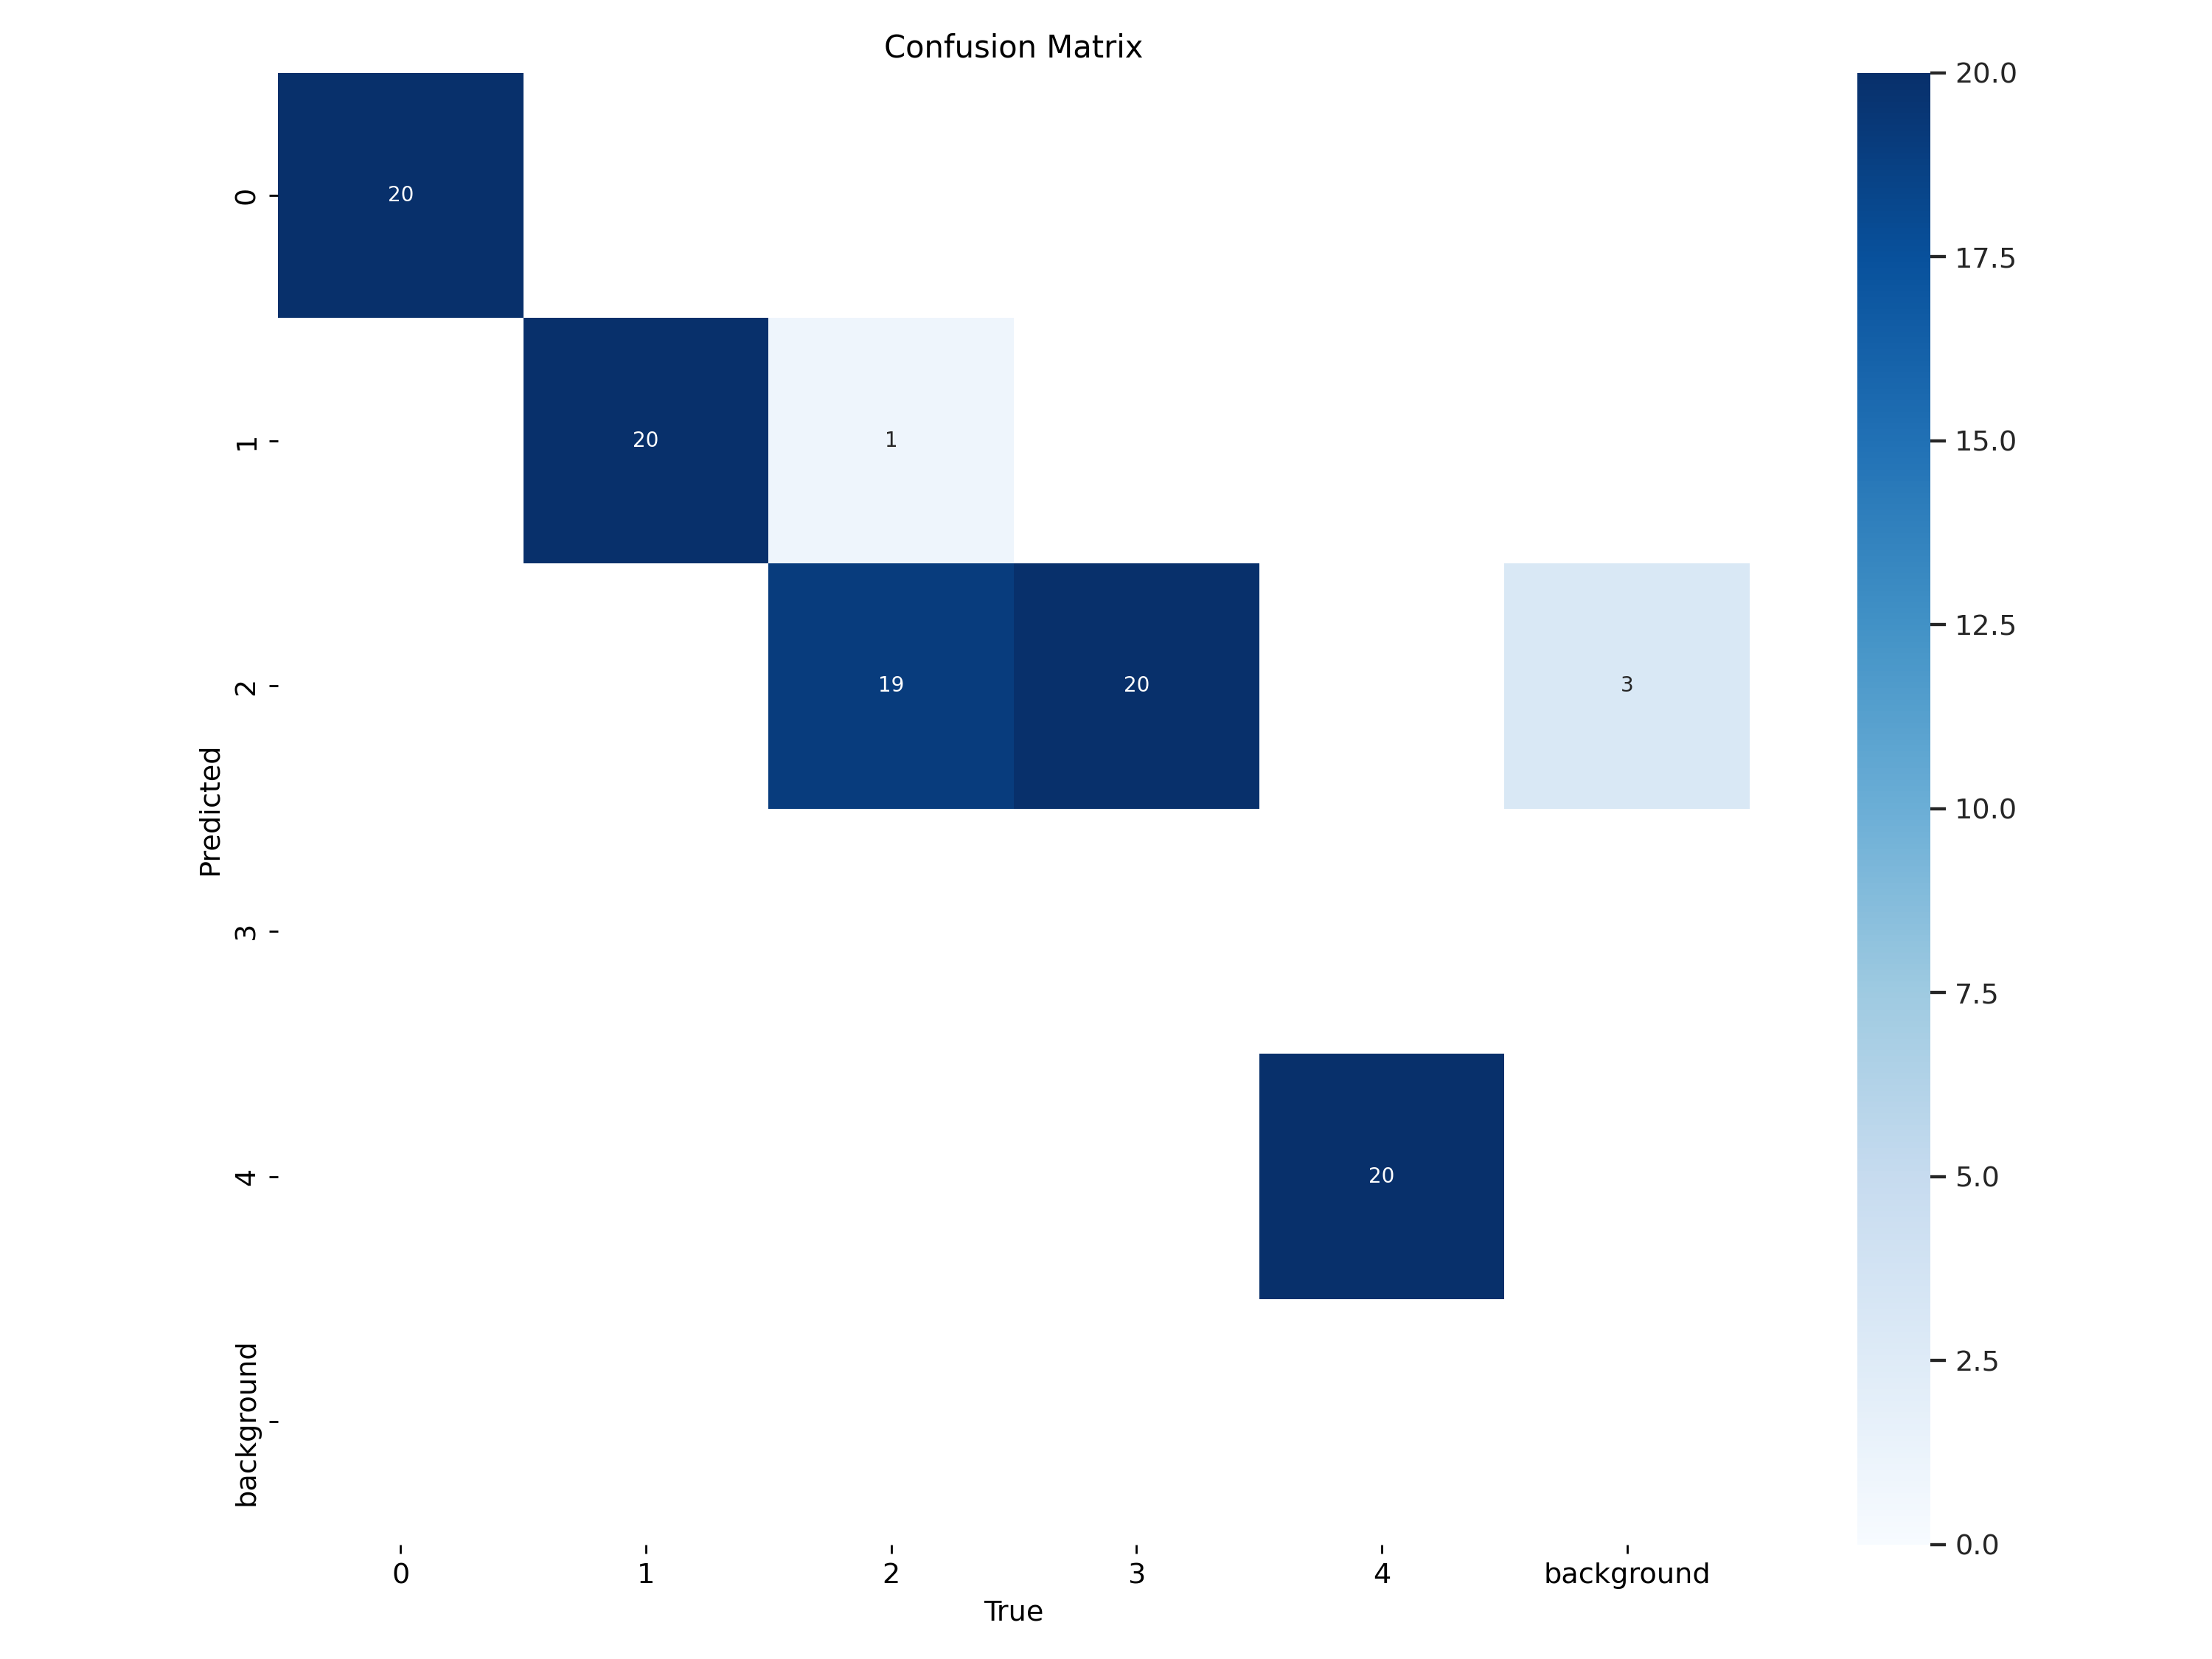

In [ ]:
Image(filename=f'/content/runs/detect/train/confusion_matrix.png', width=600)


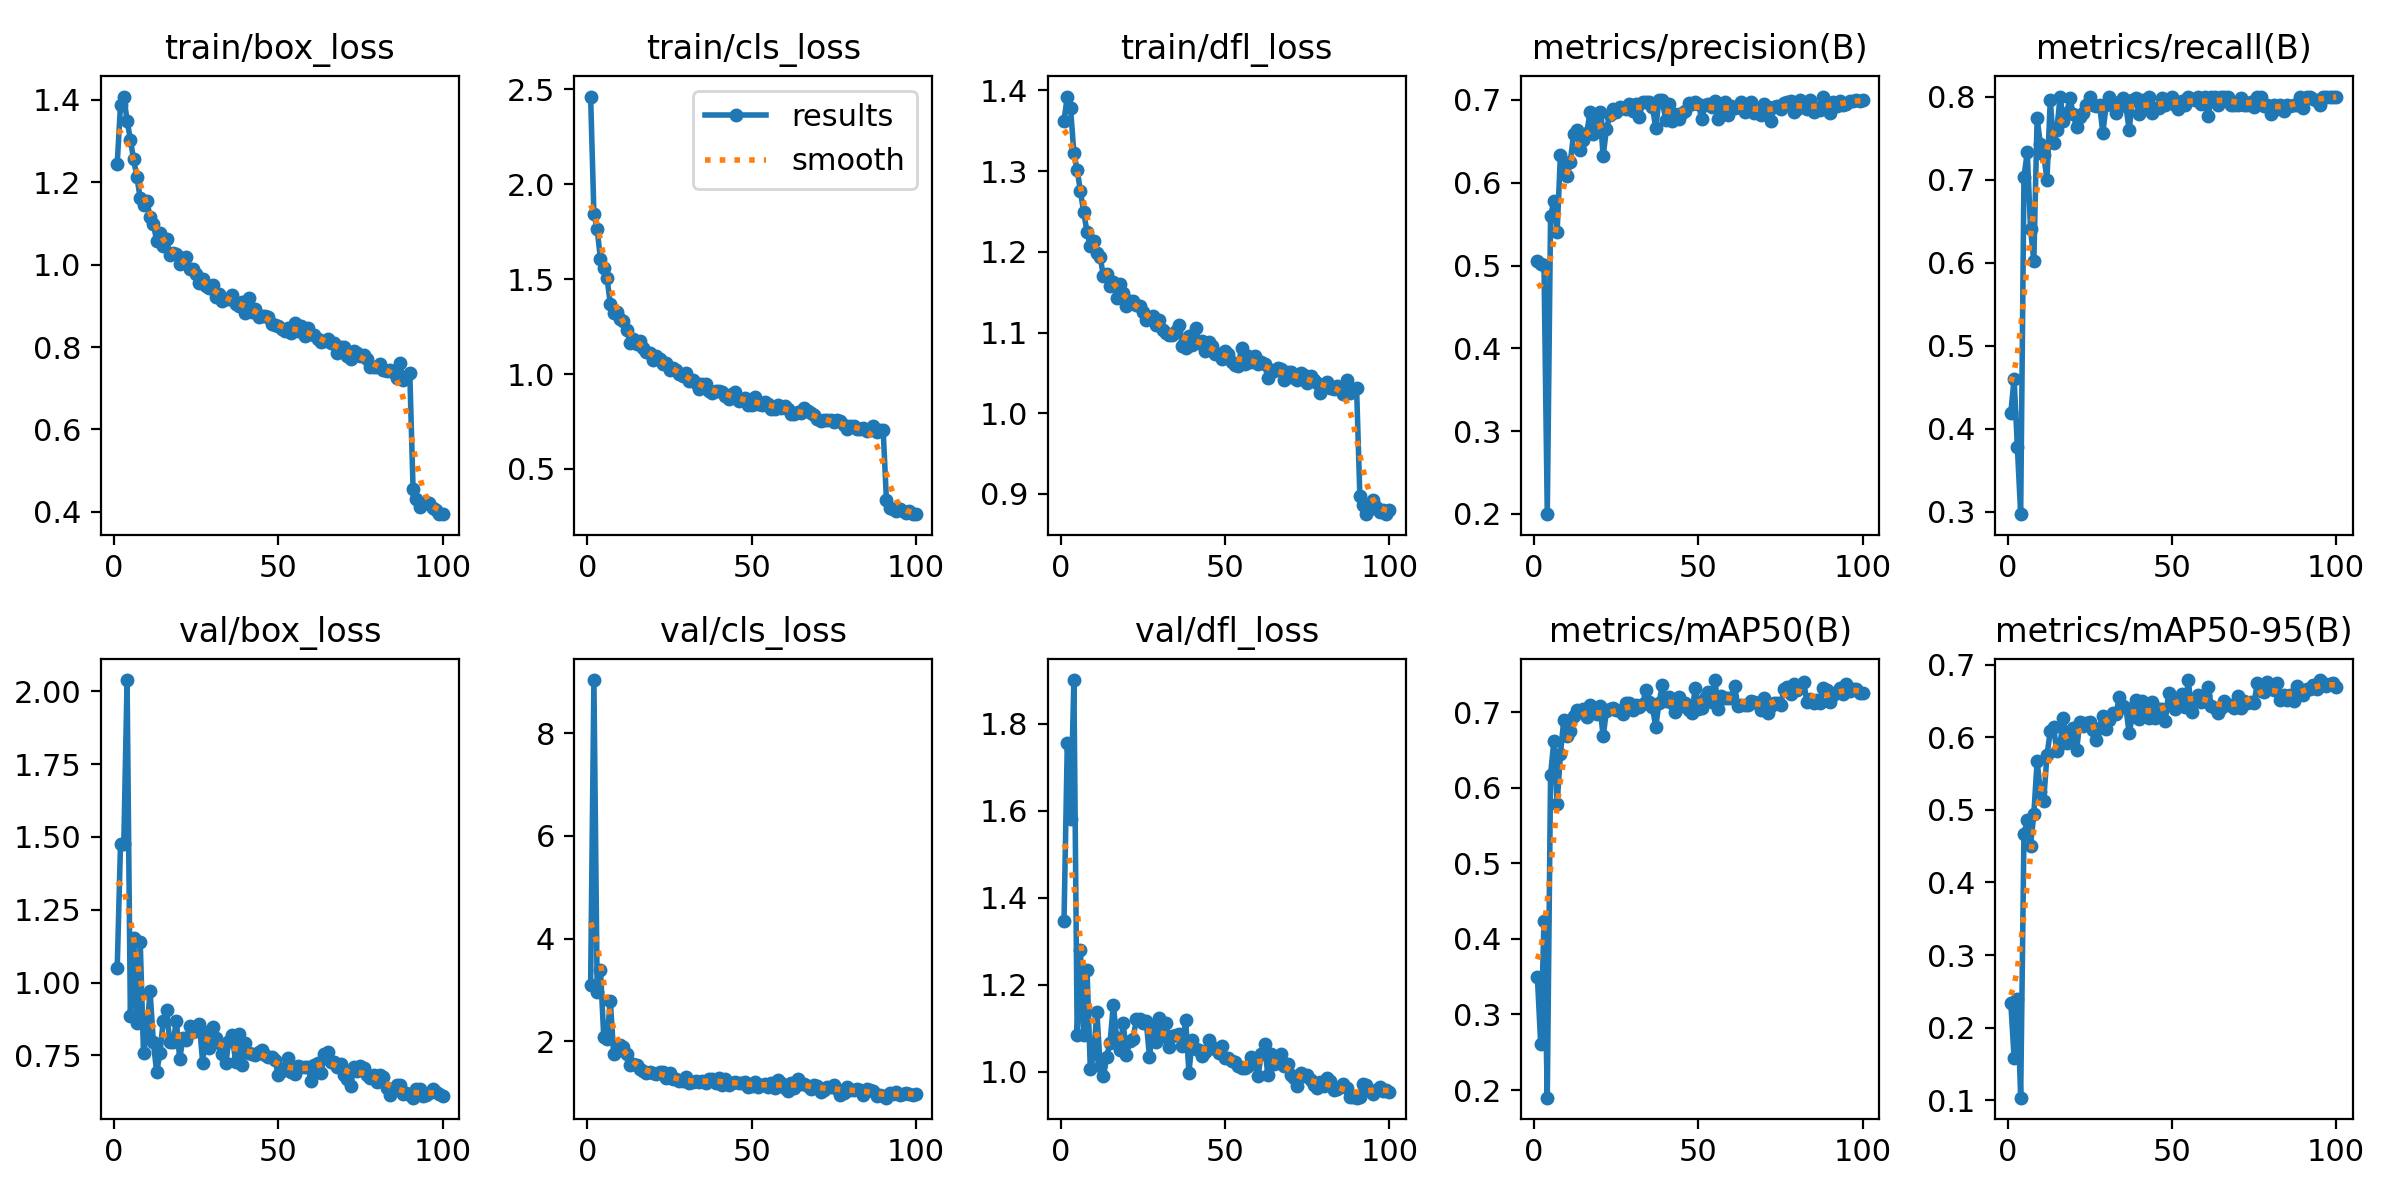

In [ ]:
Image(filename=f'/content/runs/detect/train/results.png', width=600)


In [ ]:
!yolo task=detect mode=val model=/content/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

Ultralytics YOLOv8.1.42 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25842655 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /content/Red-Chilli-1/valid/labels.cache... 100 images, 0 backgrounds, 0 corrupt: 100% 100/100 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 7/7 [00:05<00:00,  1.25it/s]
                   all        100        100      0.695       0.79      0.738       0.68
                     0        100         20      0.996          1      0.995      0.896
                     1        100         20      0.992          1      0.995      0.934
                     2        100         20      0.487       0.95      0.704       0.65
                     3        100         20          0          0          0          0
                     4        100         20      0.997          1      0.995      0.919
Speed: 4.9ms preprocess, 20.9ms inference, 0.0ms

In [ ]:
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.5 source={dataset.location}/test/images/*.jpg

Ultralytics YOLOv8.1.42 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25842655 parameters, 0 gradients, 78.7 GFLOPs

image 1/100 /content/Red-Chilli-1/test/images/chili_grade_A_101_jpg.rf.60fa4690c609a2e3f7465b2c92b1b5ce.jpg: 608x608 1 0, 36.2ms
image 2/100 /content/Red-Chilli-1/test/images/chili_grade_A_106_jpg.rf.b2e8ca060b9cc99a6a56cc1205ce467c.jpg: 608x608 1 0, 36.2ms
image 3/100 /content/Red-Chilli-1/test/images/chili_grade_A_115_jpg.rf.bf24c30f55a0d7645a9d1af88030efb6.jpg: 608x608 1 0, 36.1ms
image 4/100 /content/Red-Chilli-1/test/images/chili_grade_A_118_jpg.rf.03ed3d58829c427b153b42ac4d40cf57.jpg: 608x608 1 0, 36.2ms
image 5/100 /content/Red-Chilli-1/test/images/chili_grade_A_124_jpg.rf.1821c1f1f1c7d2236bc54e4d816da030.jpg: 608x608 1 0, 36.1ms
image 6/100 /content/Red-Chilli-1/test/images/chili_grade_A_131_jpg.rf.fa102b441f248f3939cdf632e473c094.jpg: 608x608 1 0, 35.7ms
image 7/100 /content/Red-Chilli-1/test/images/chili_grade

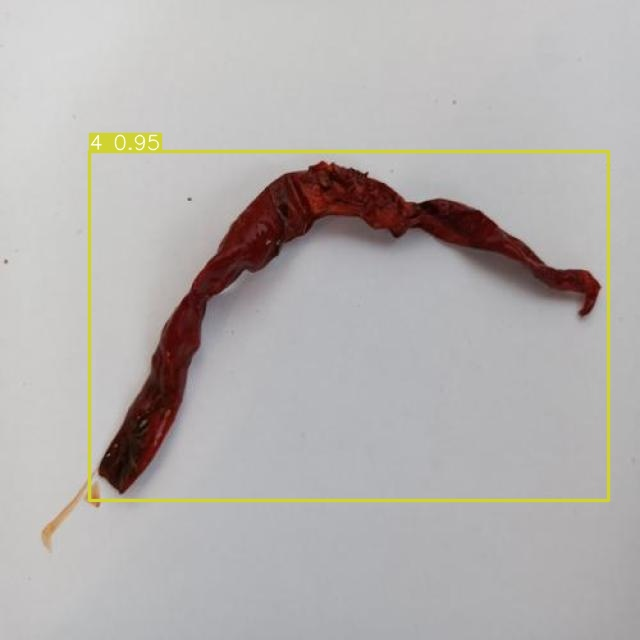

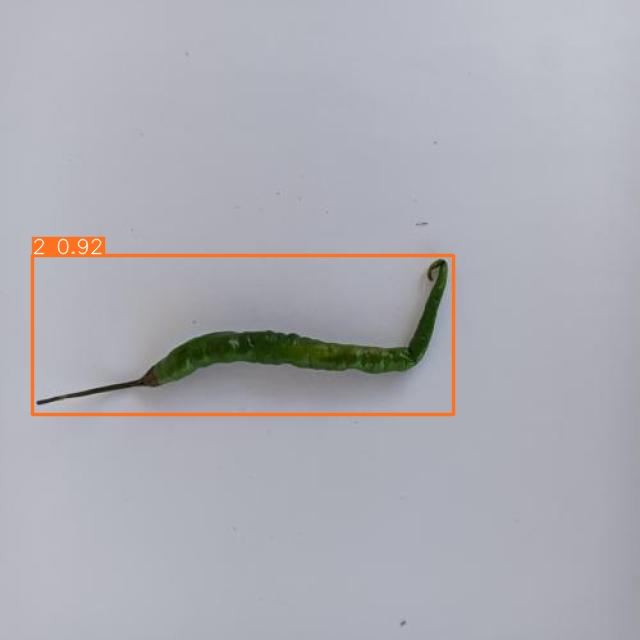

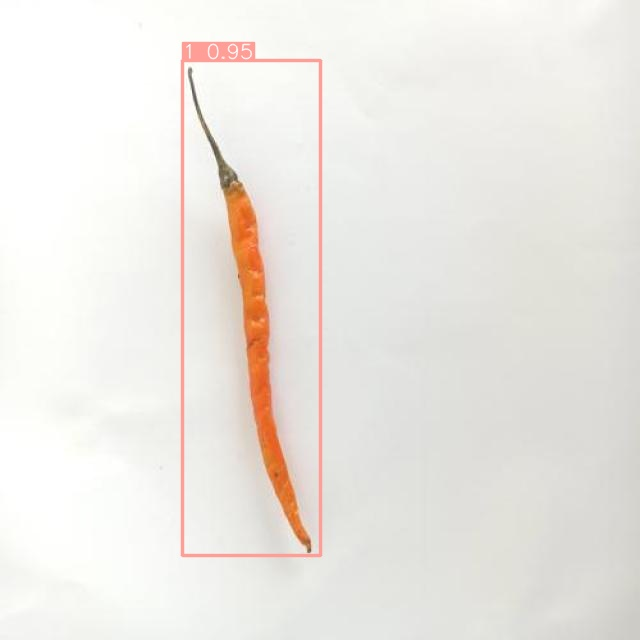

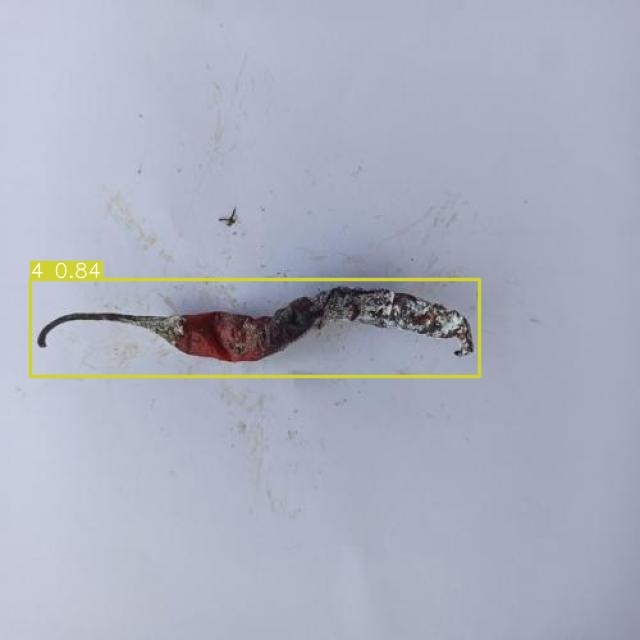

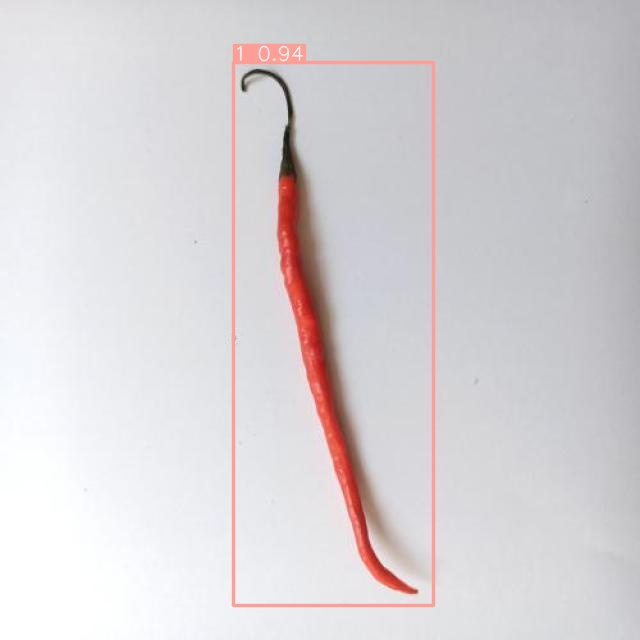

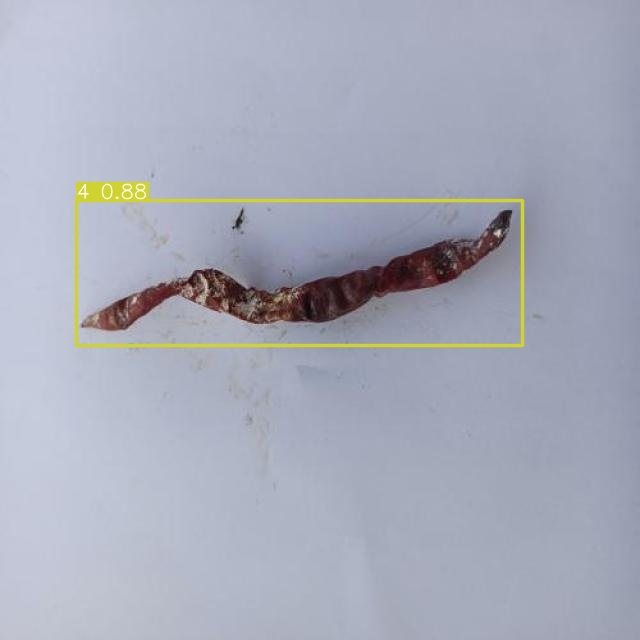

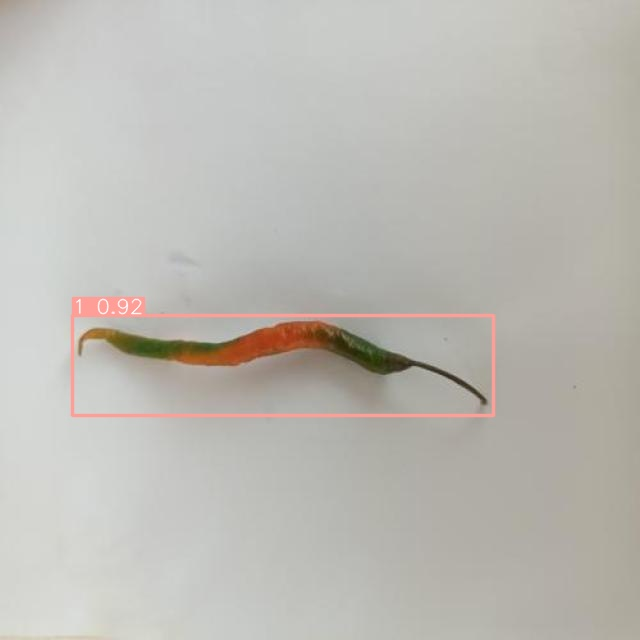

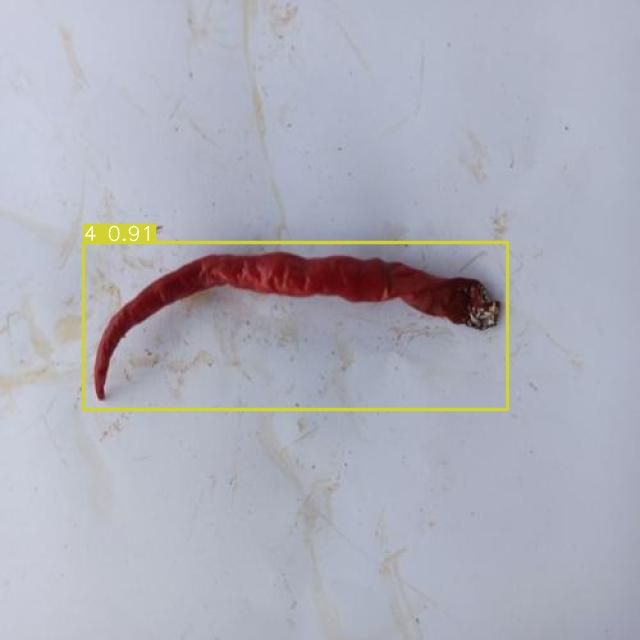

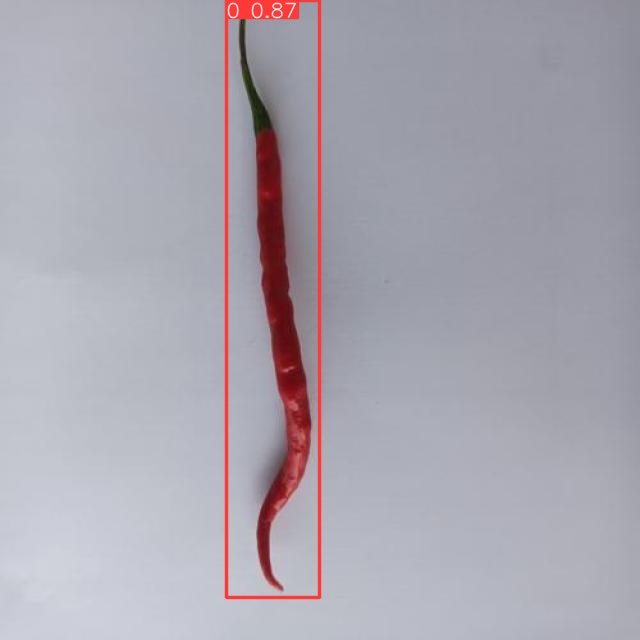

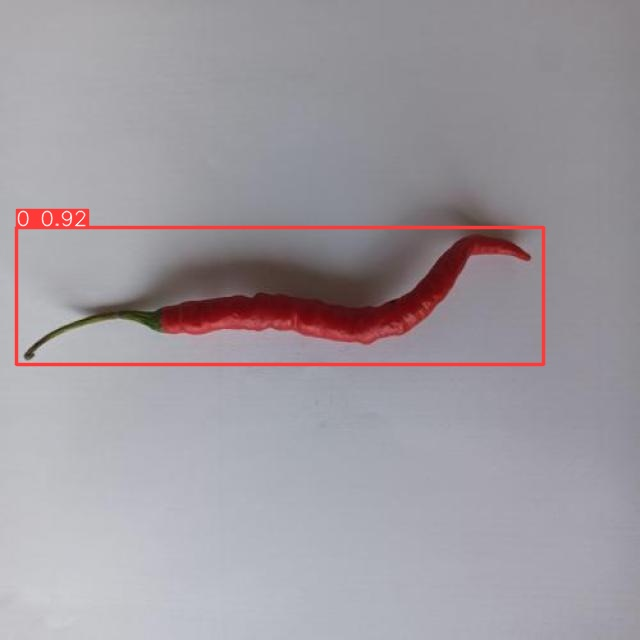

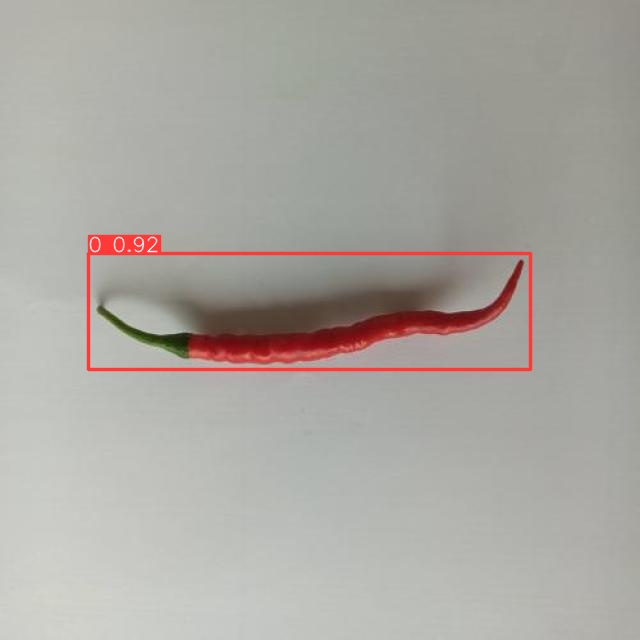

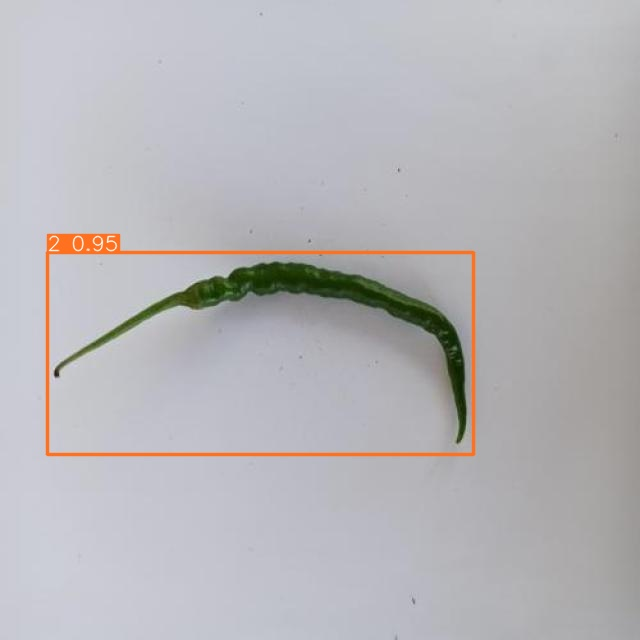

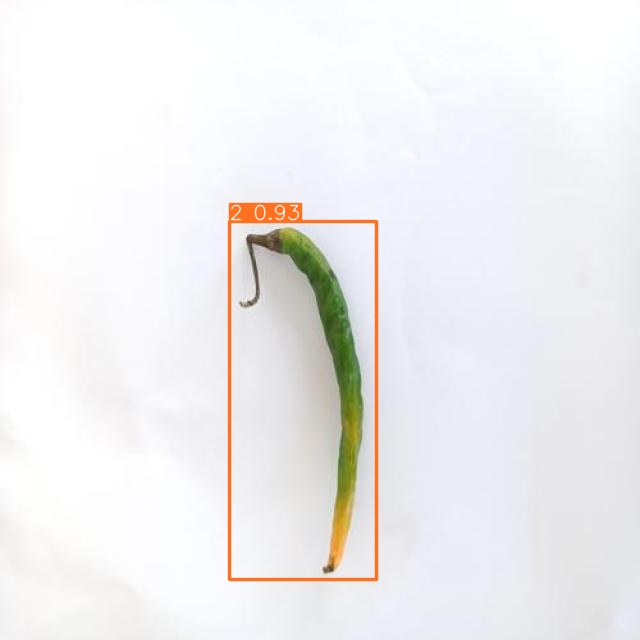

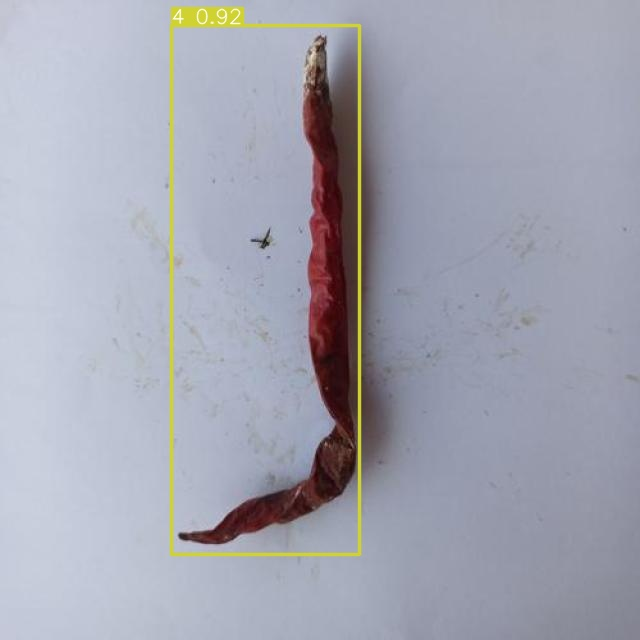

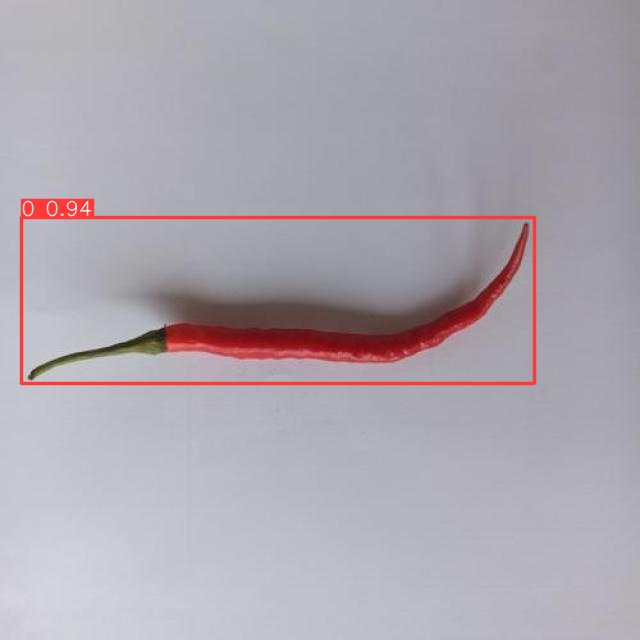

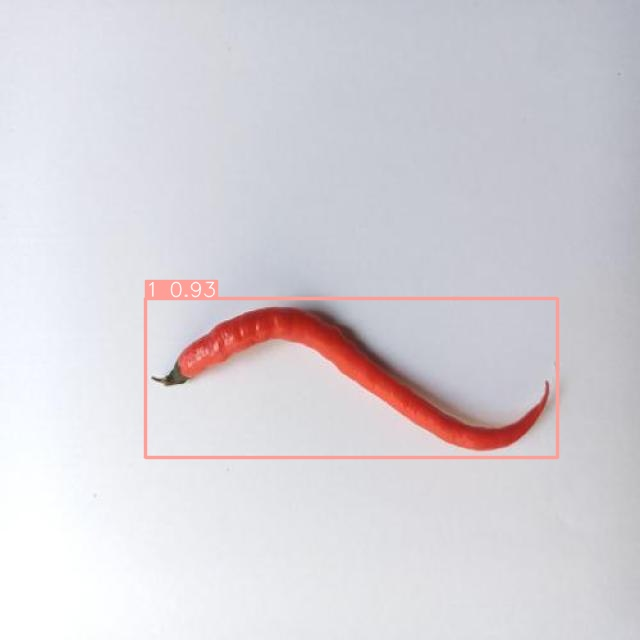

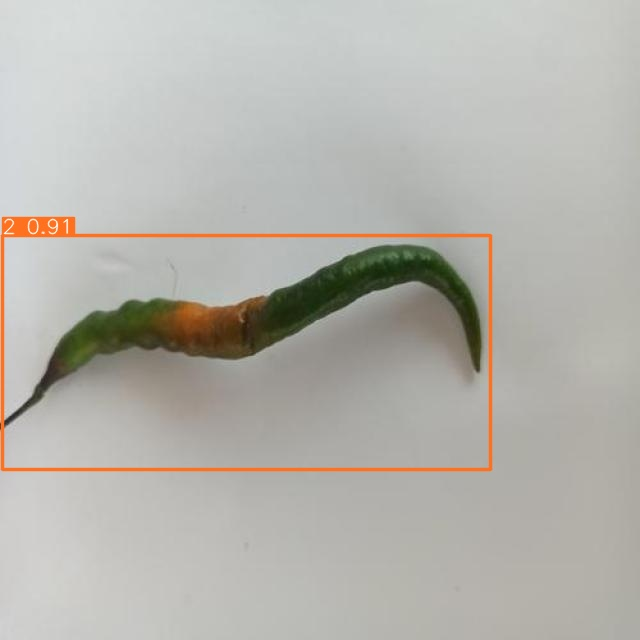

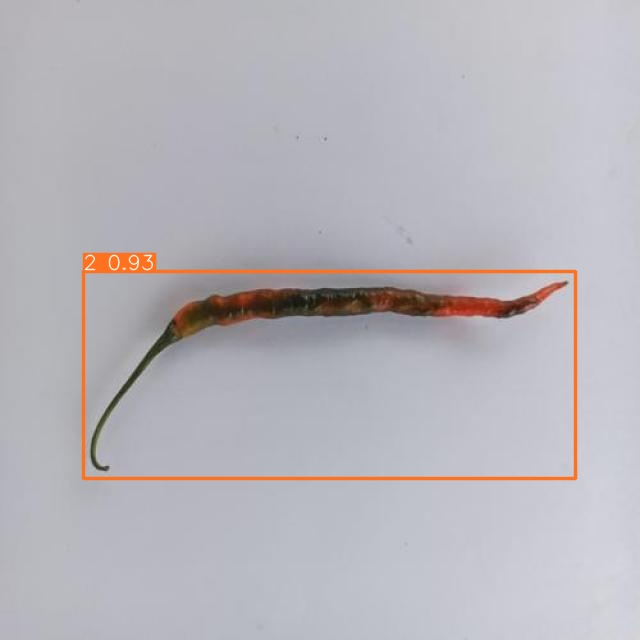

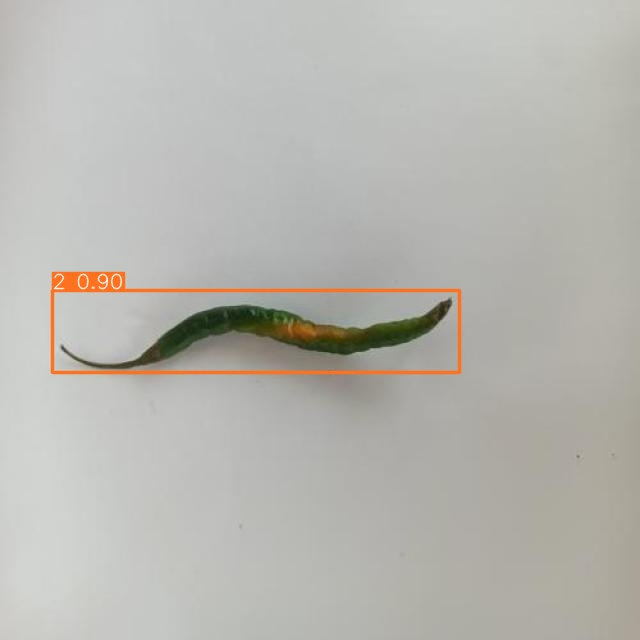

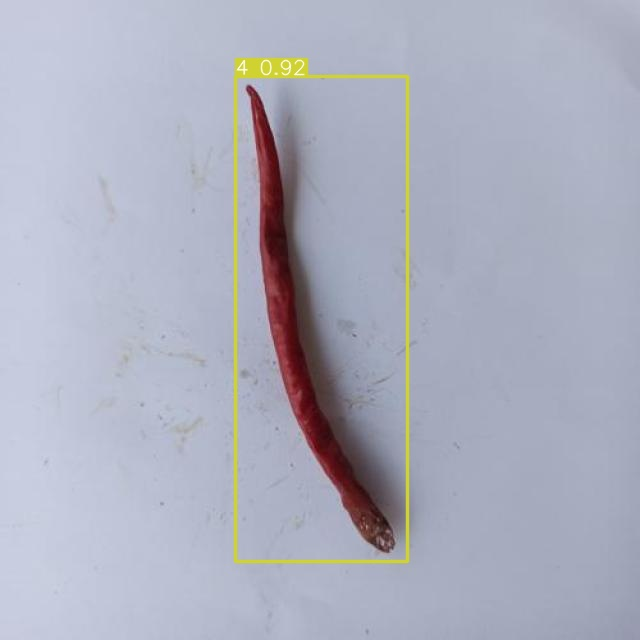

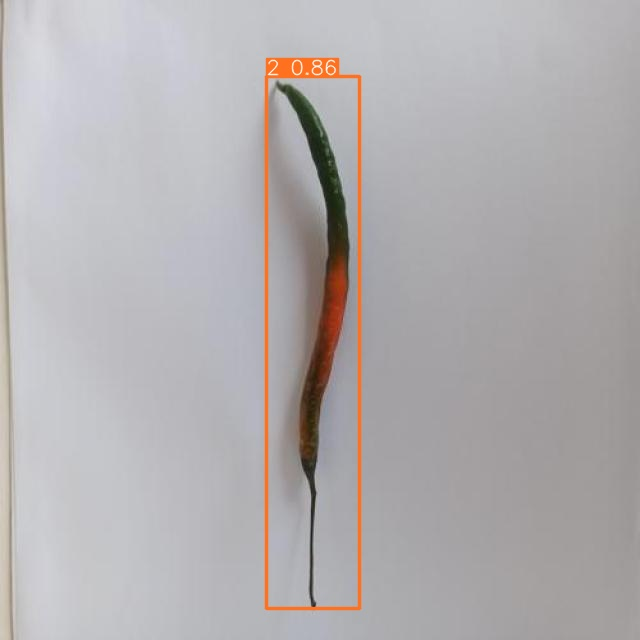

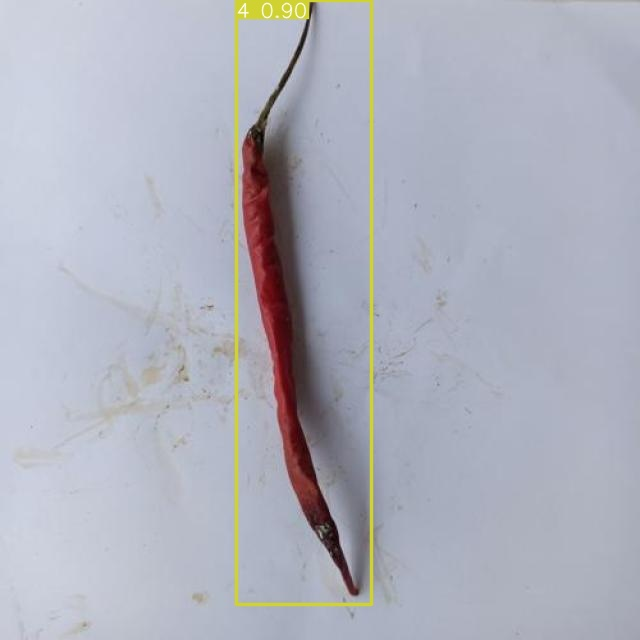

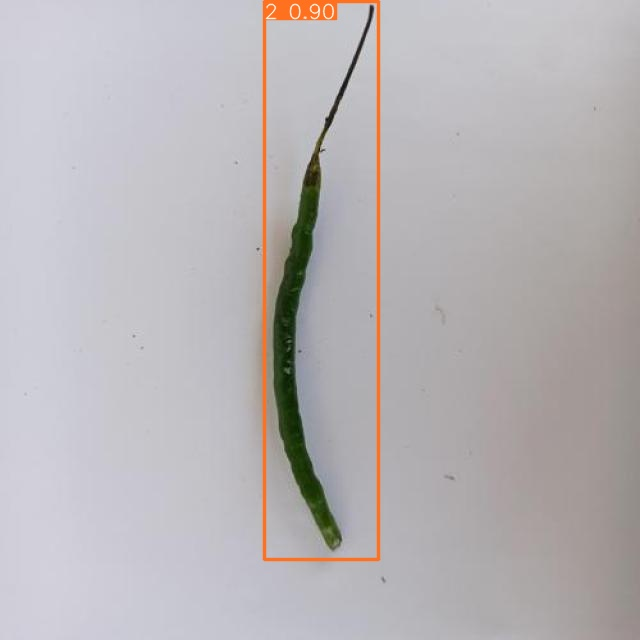

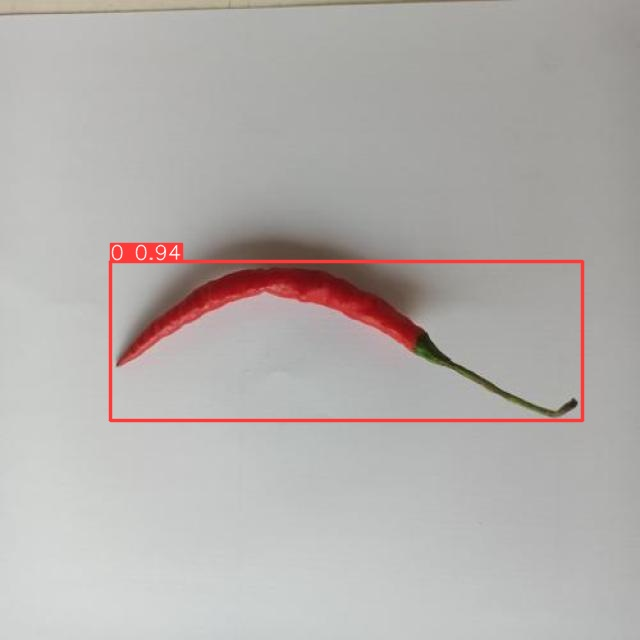

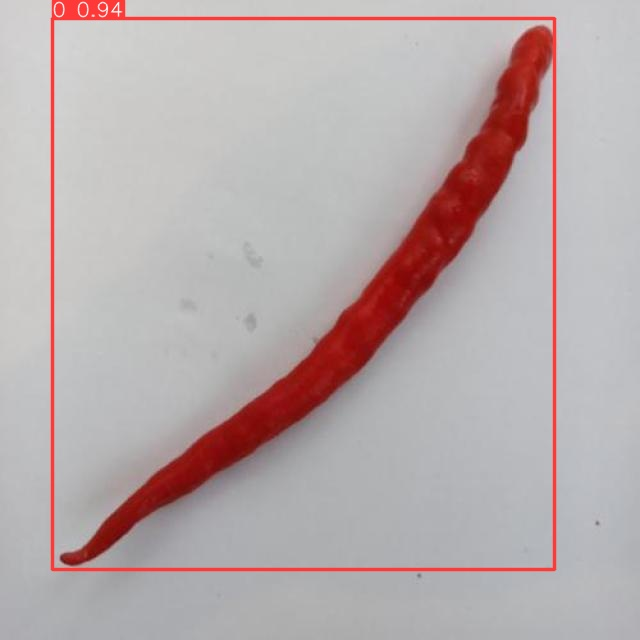

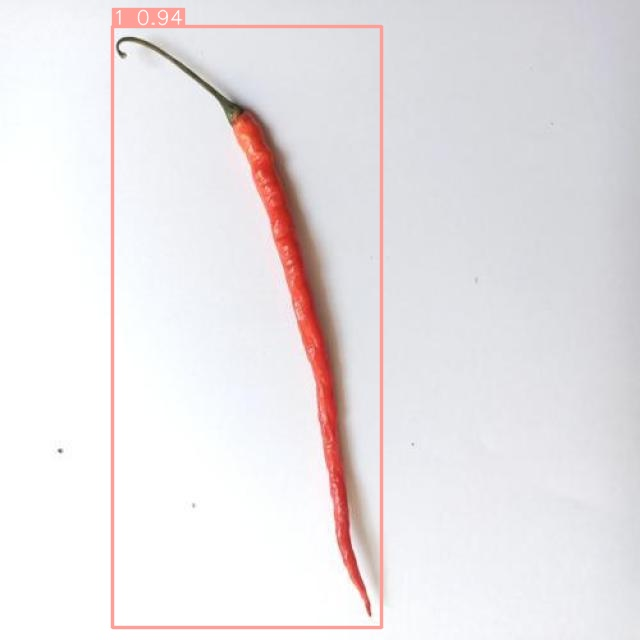

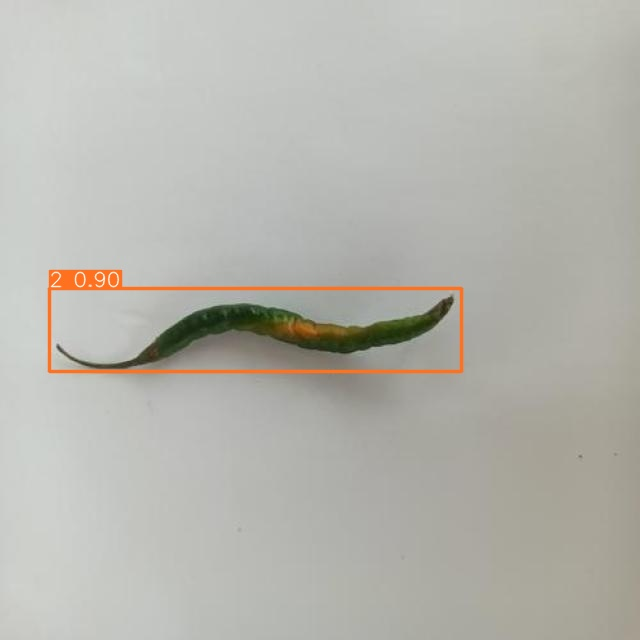

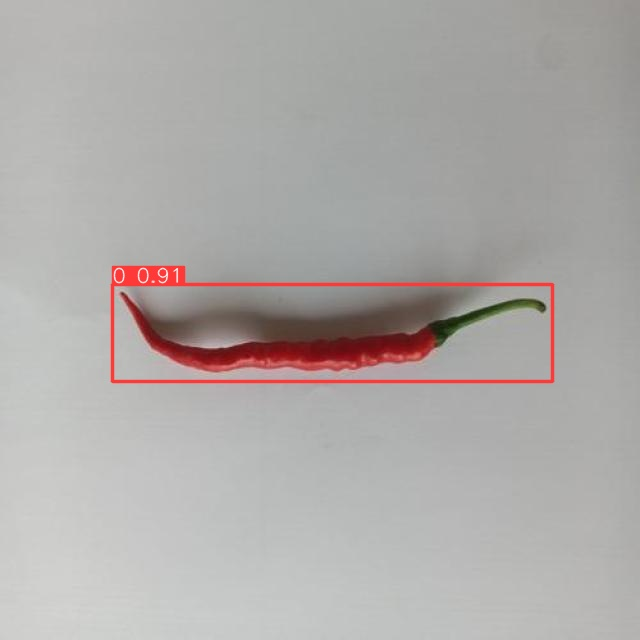

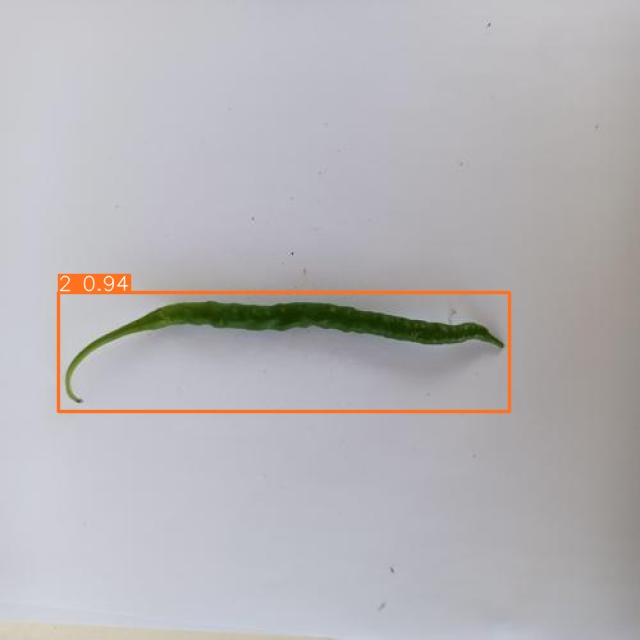

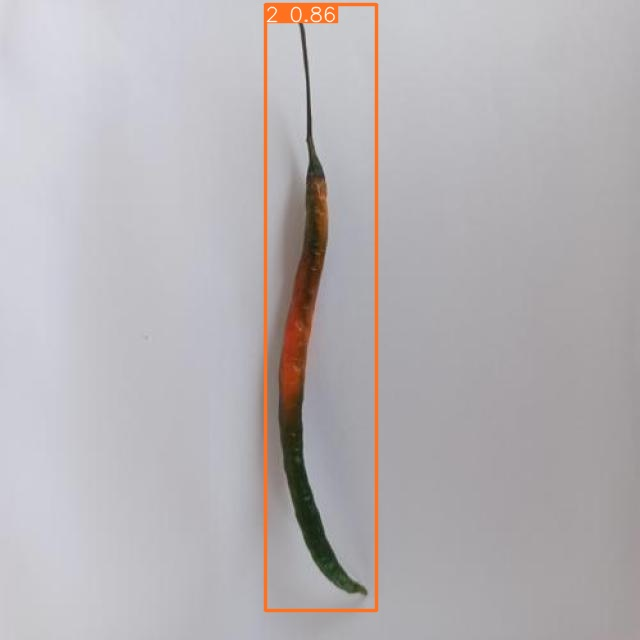

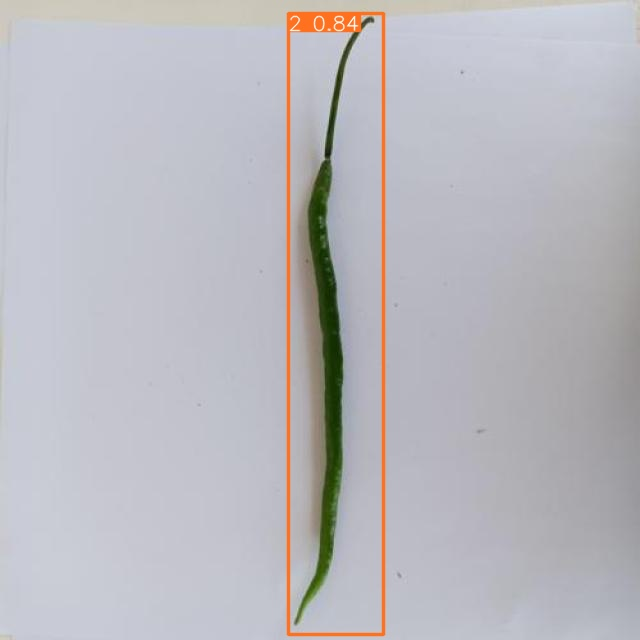

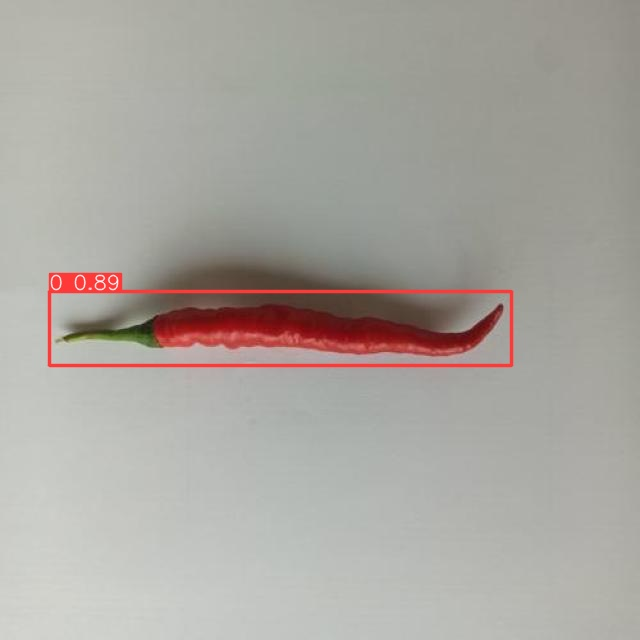

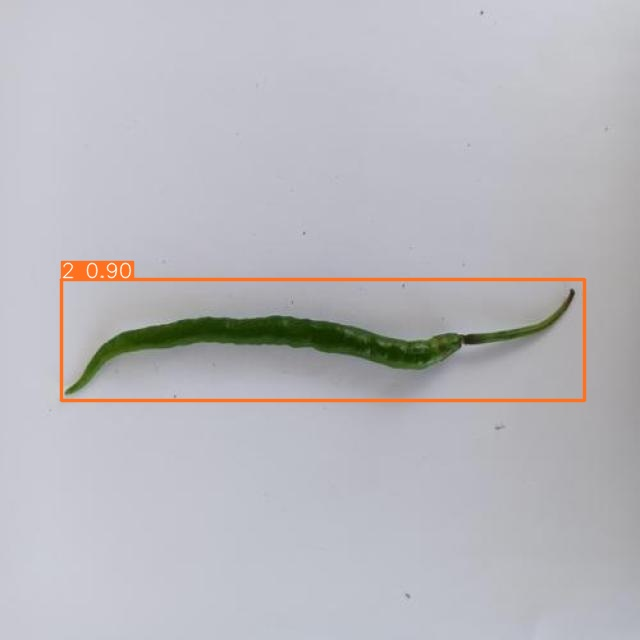

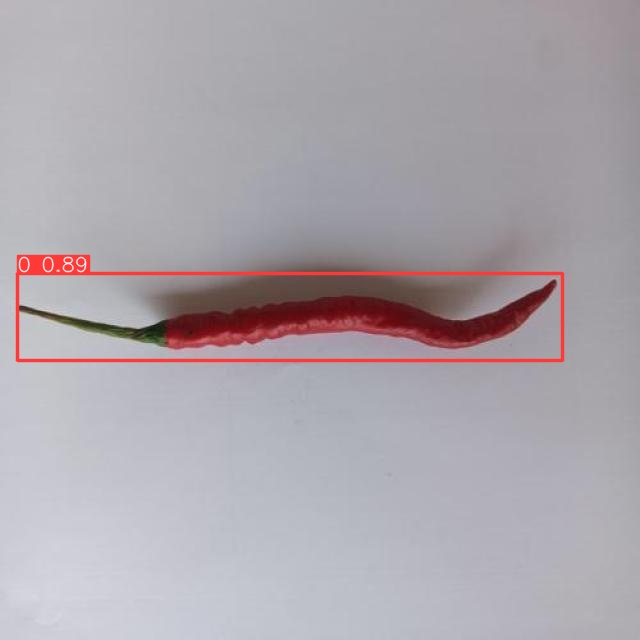

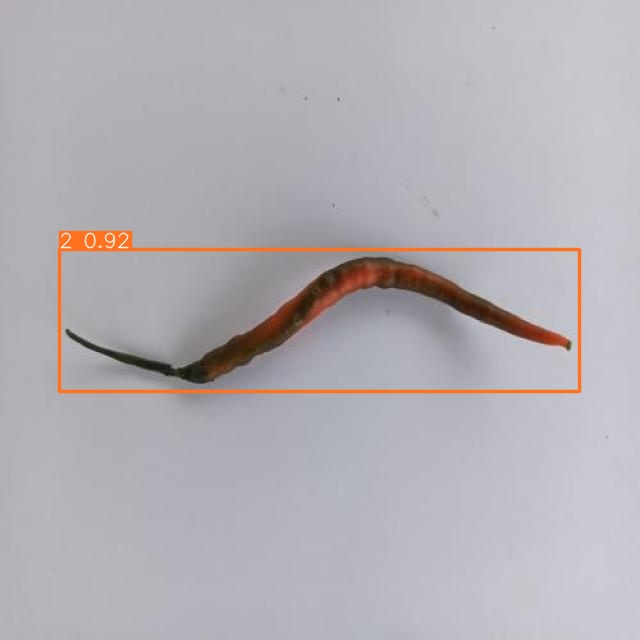

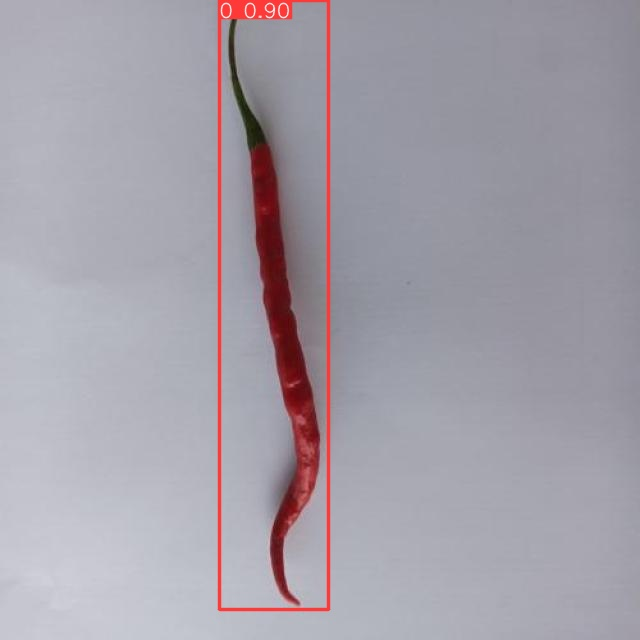

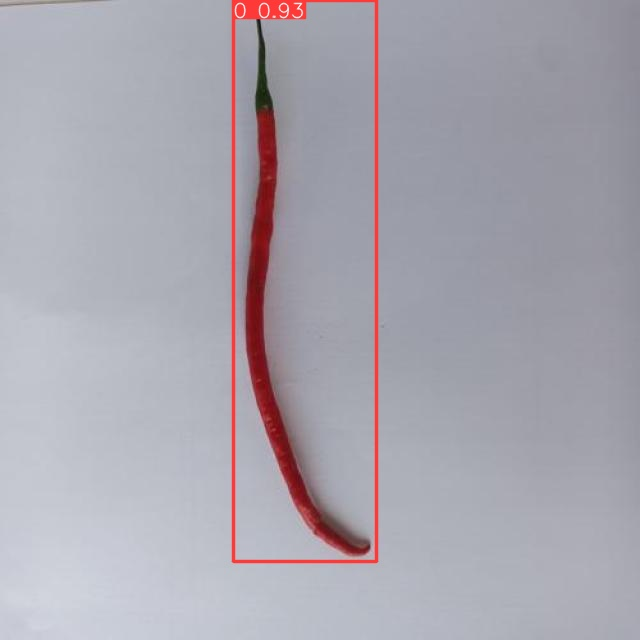

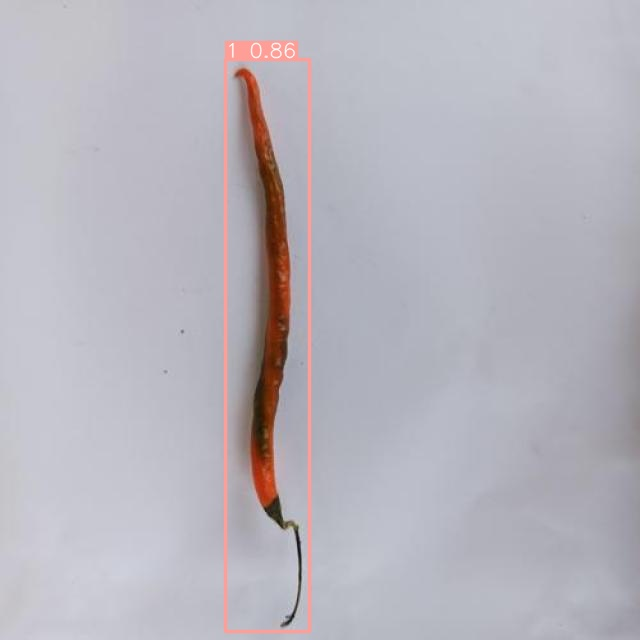

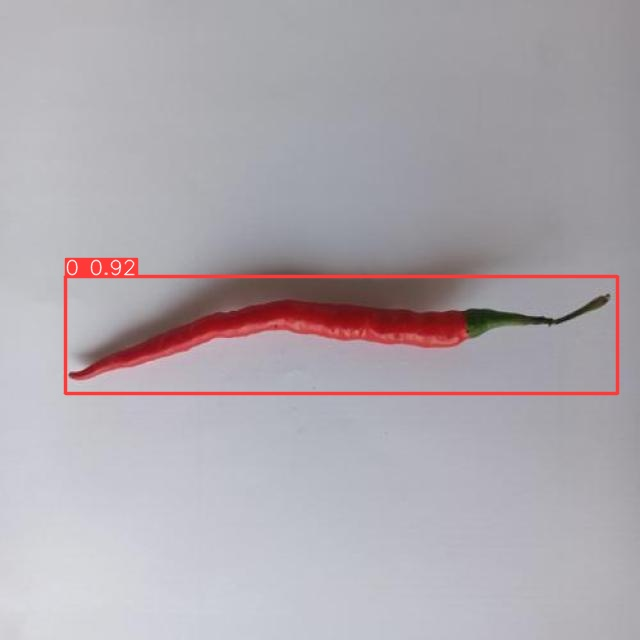

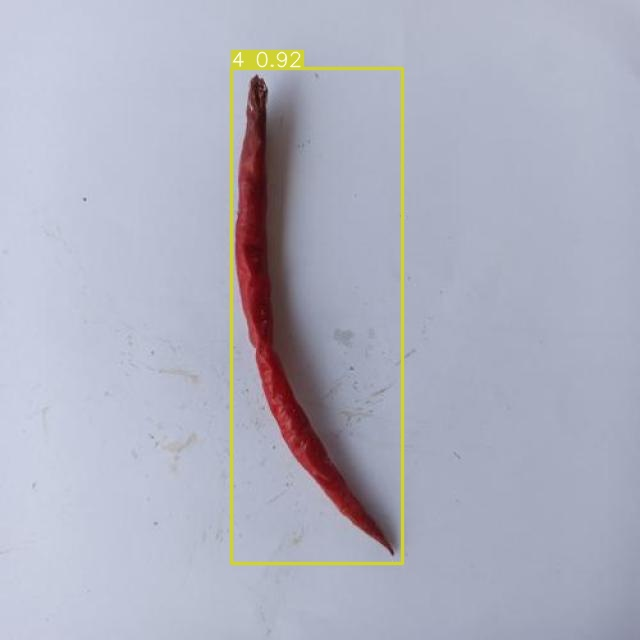

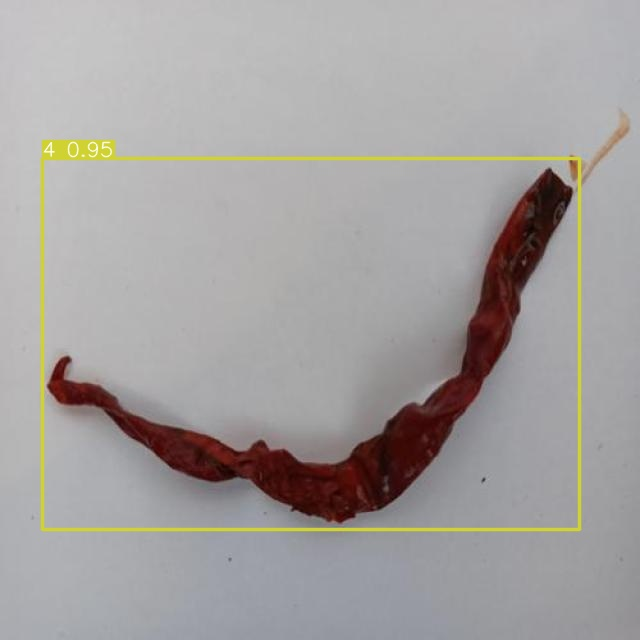

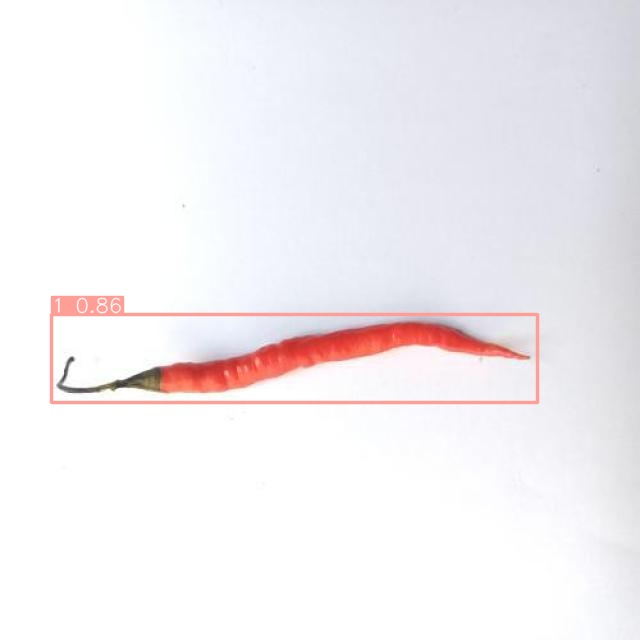

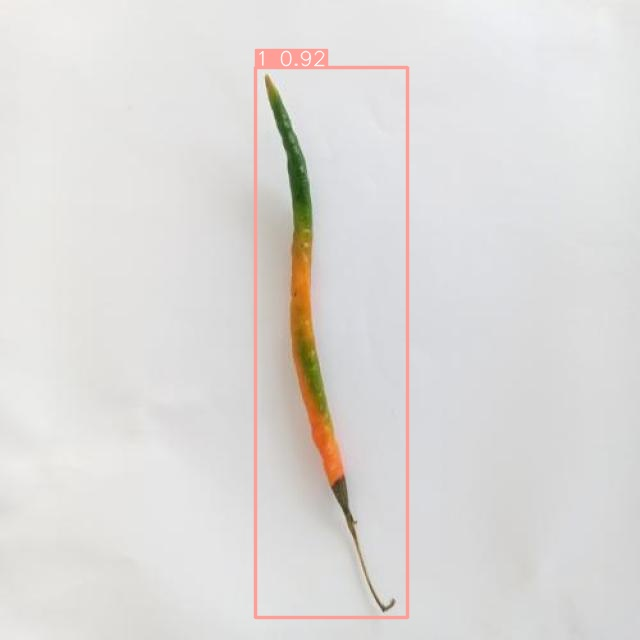

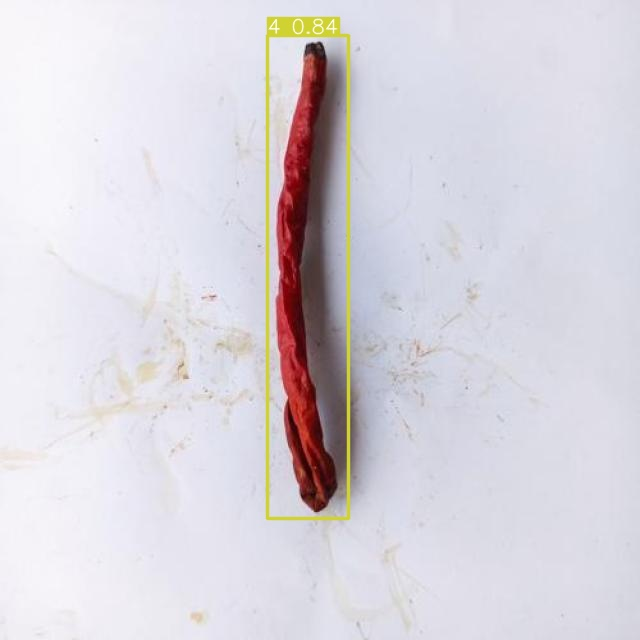

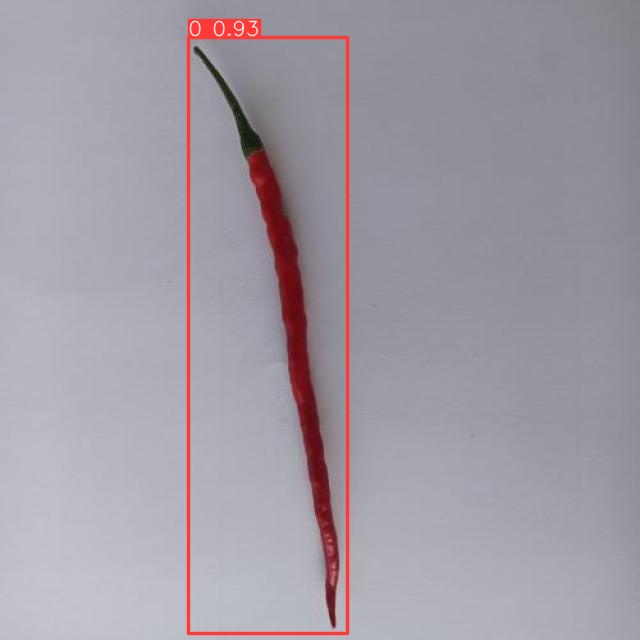

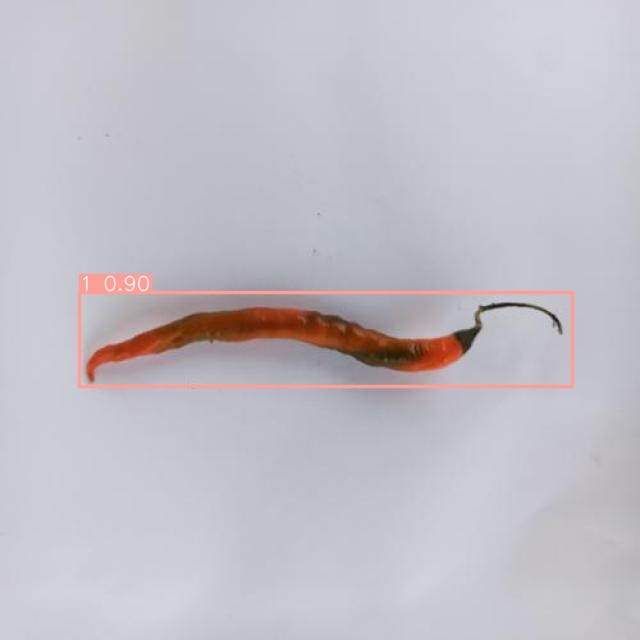

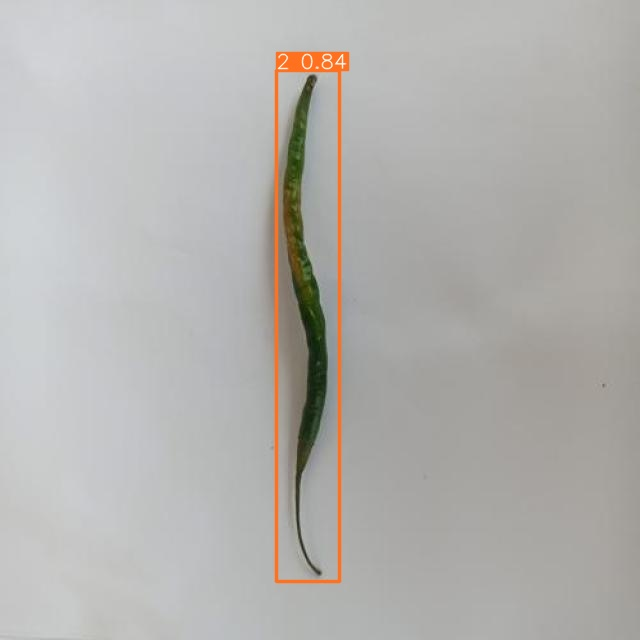

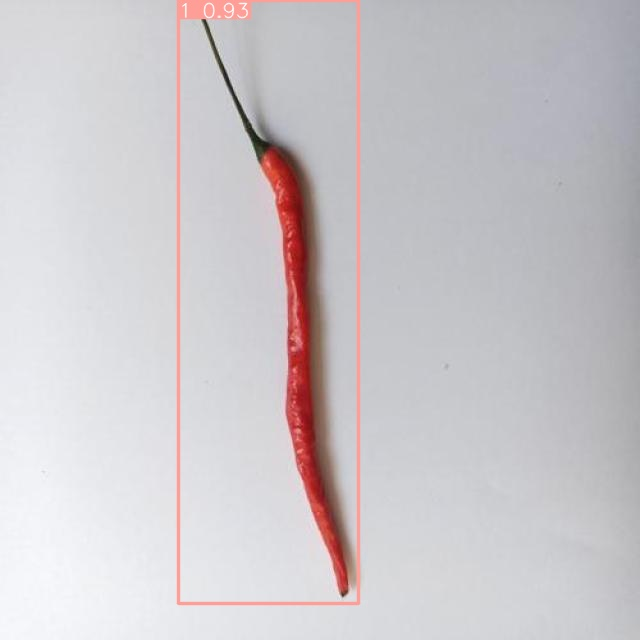

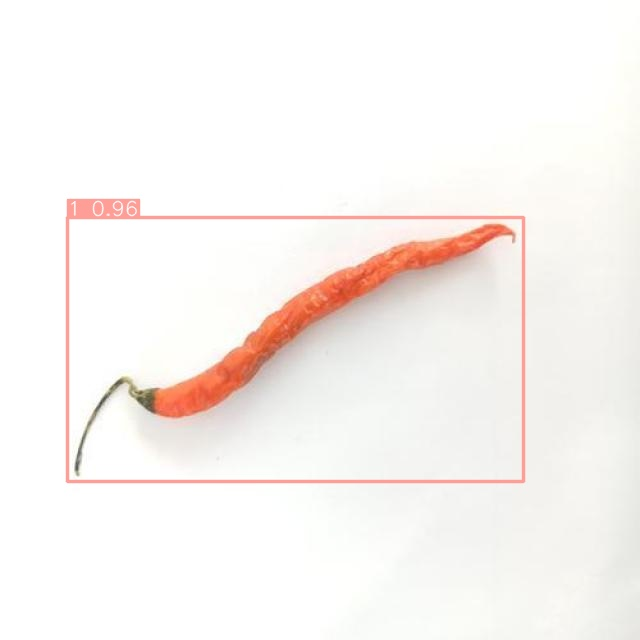

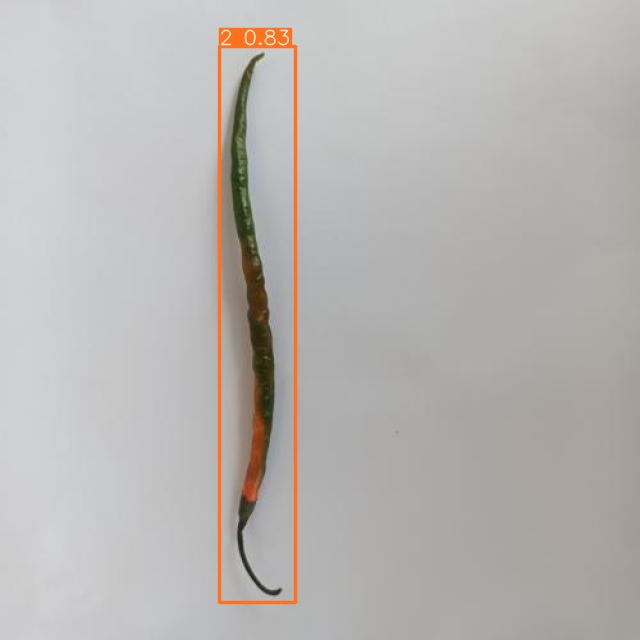

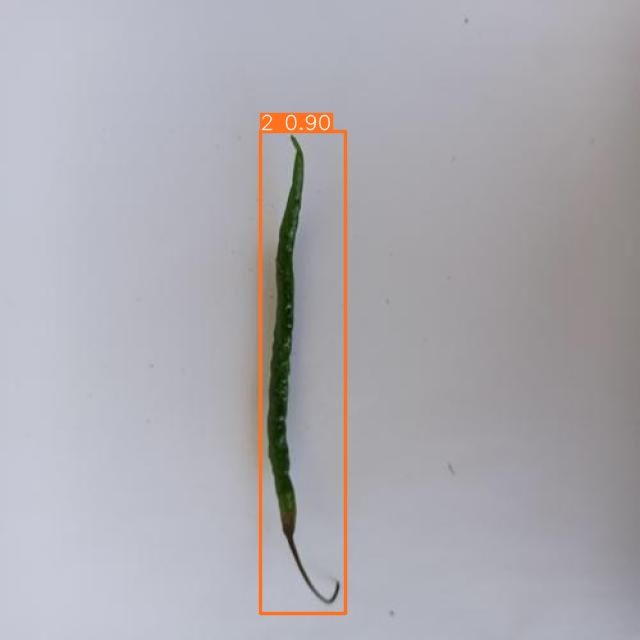

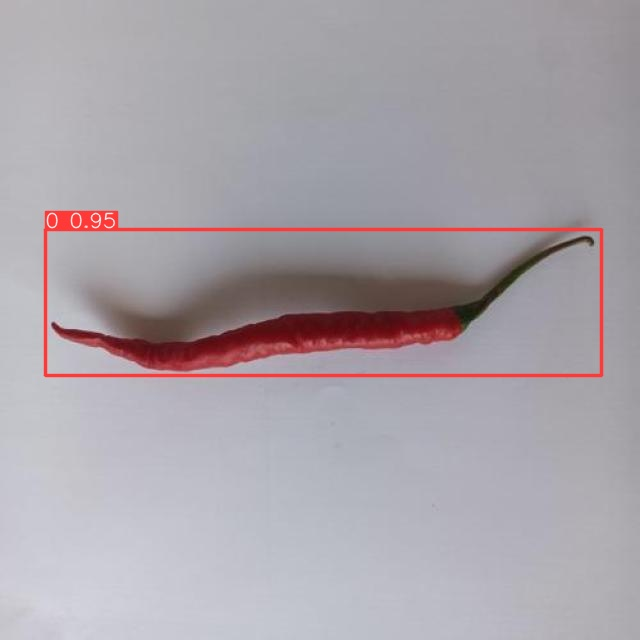

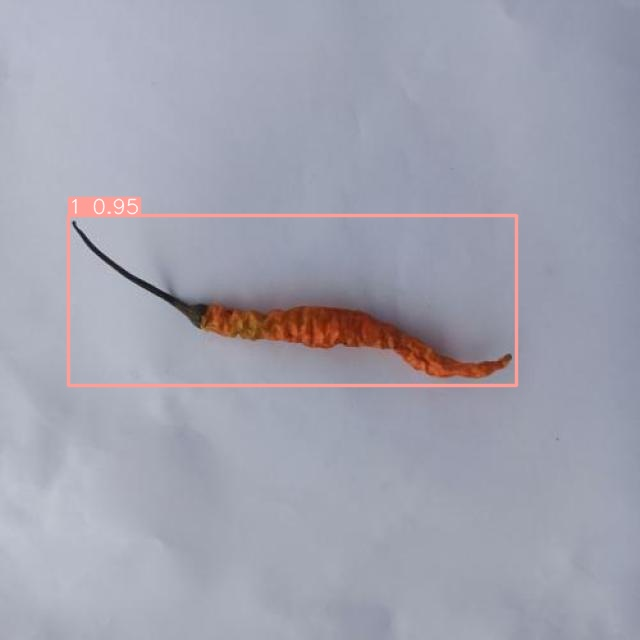

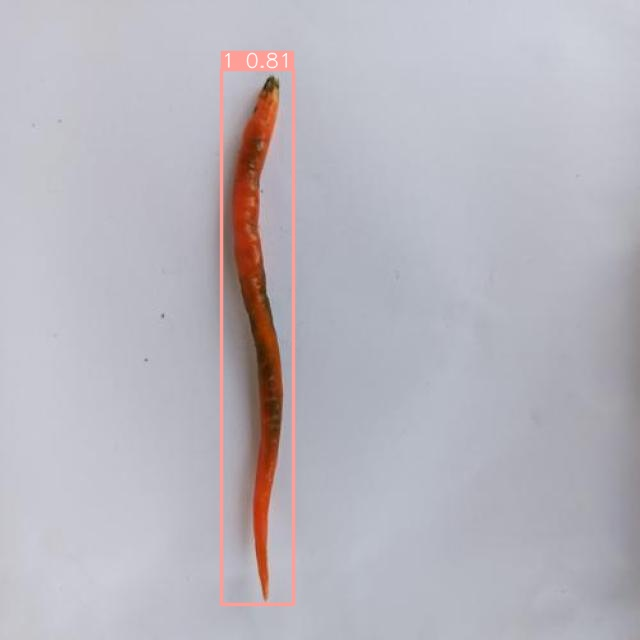

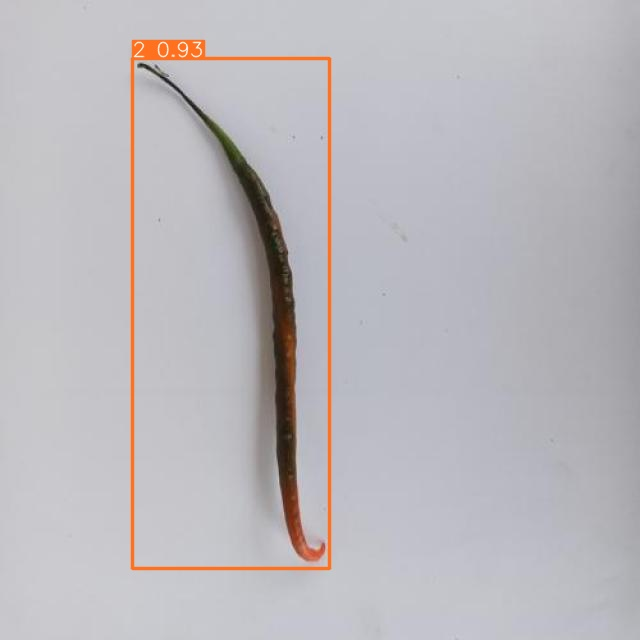

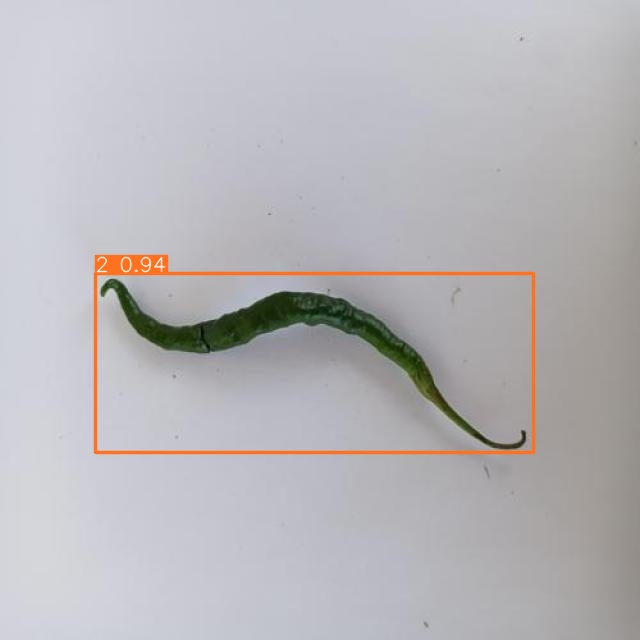

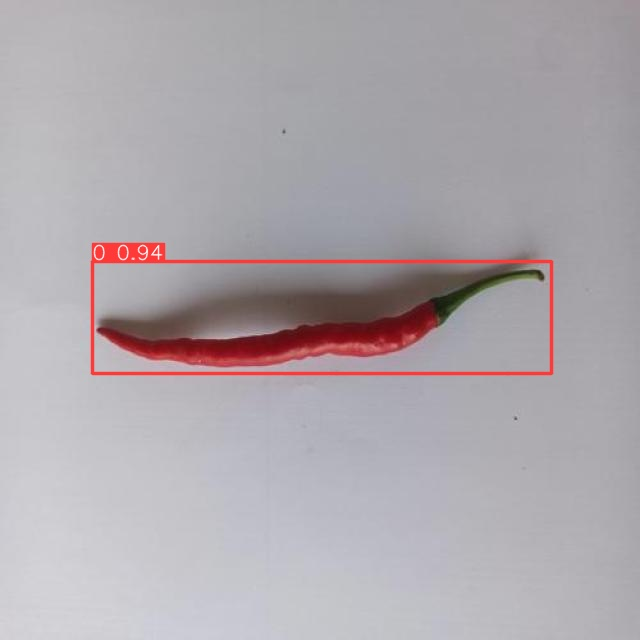

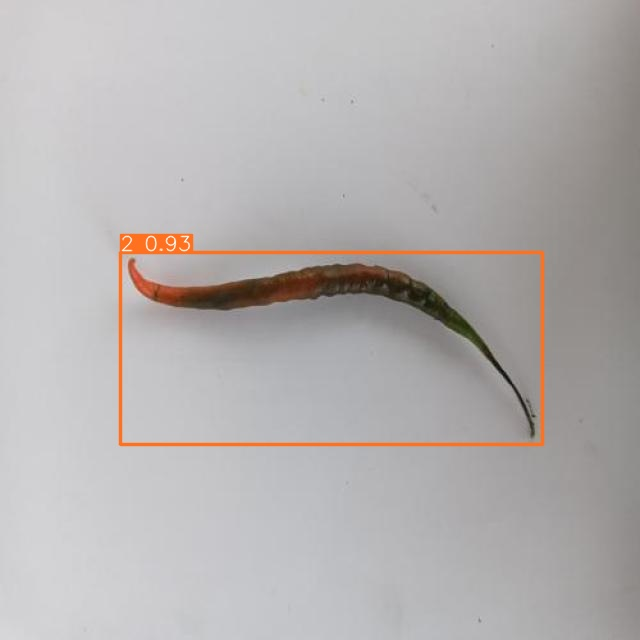

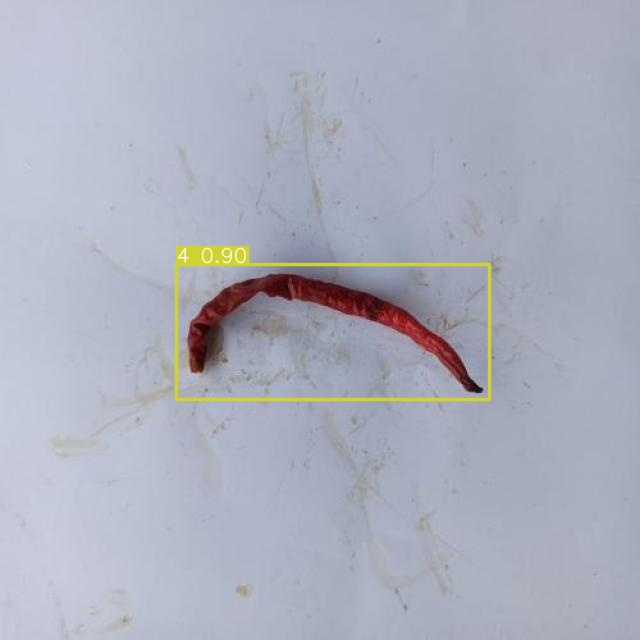

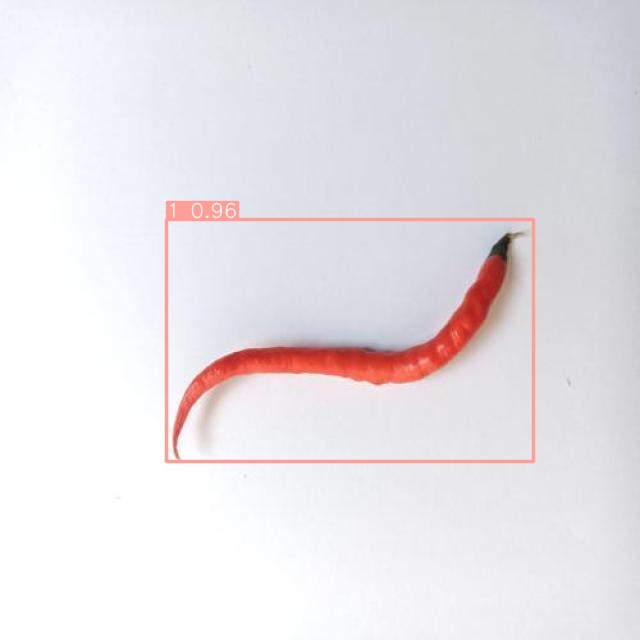

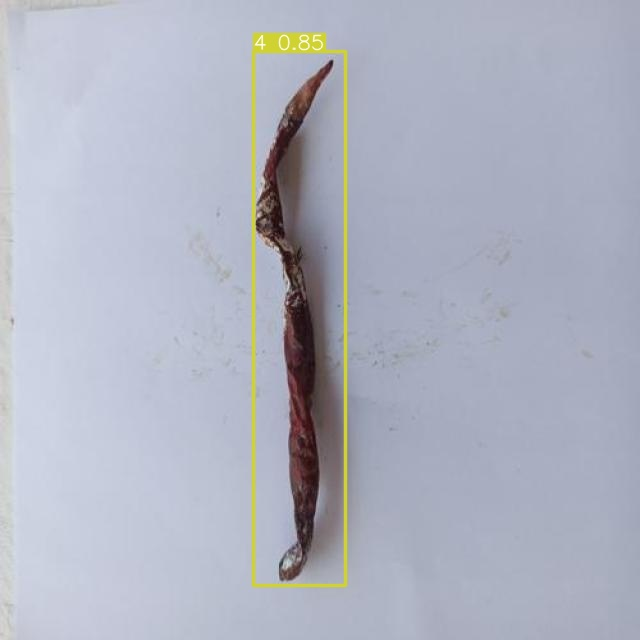

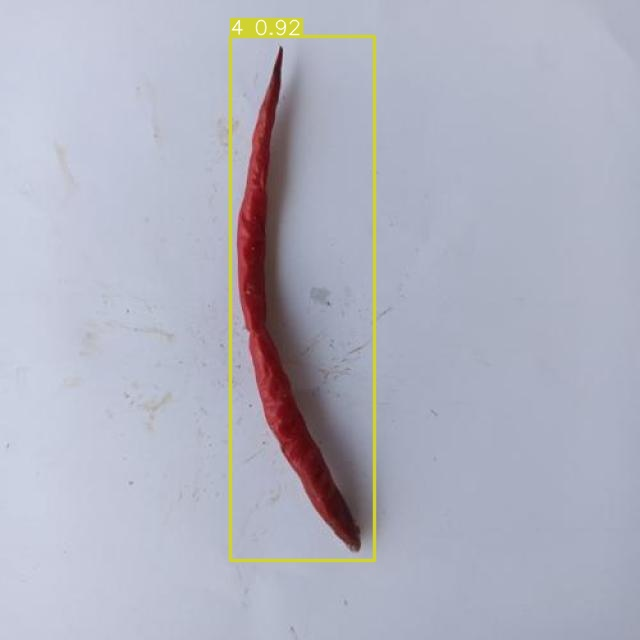

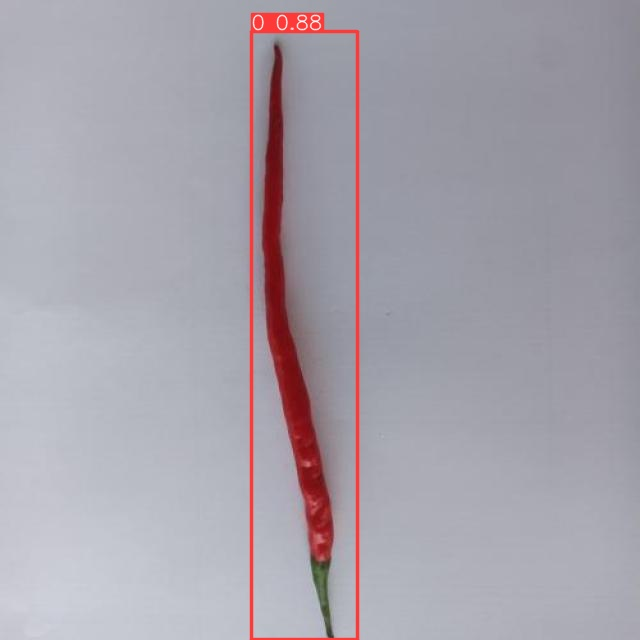

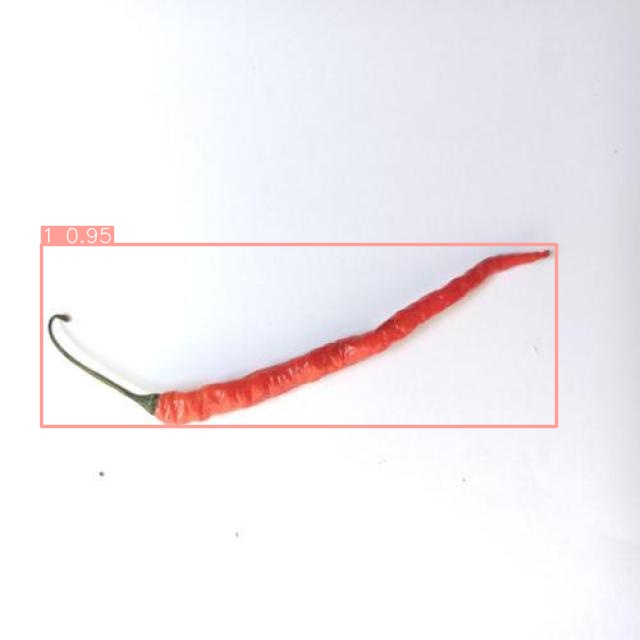

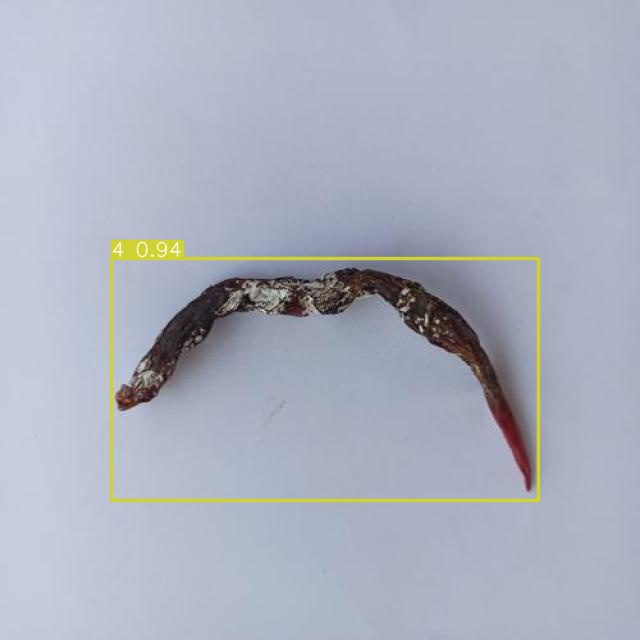

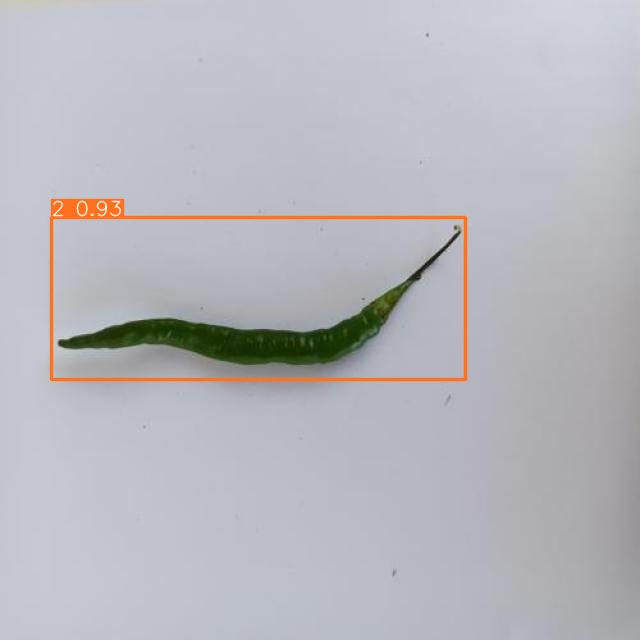

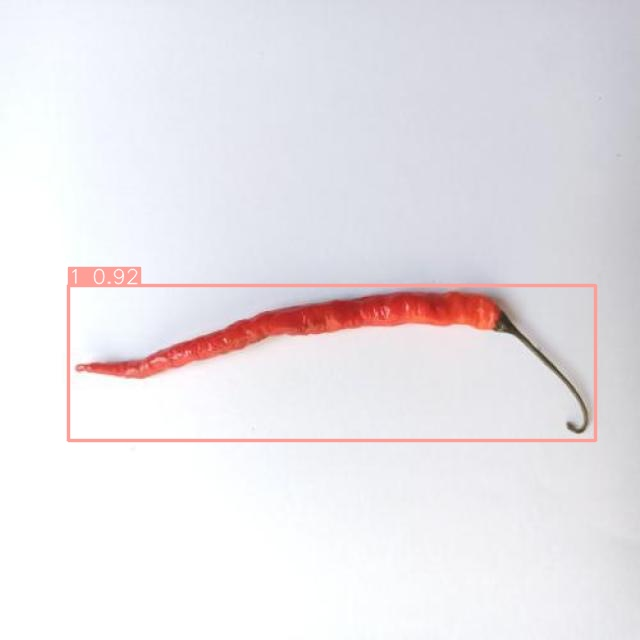

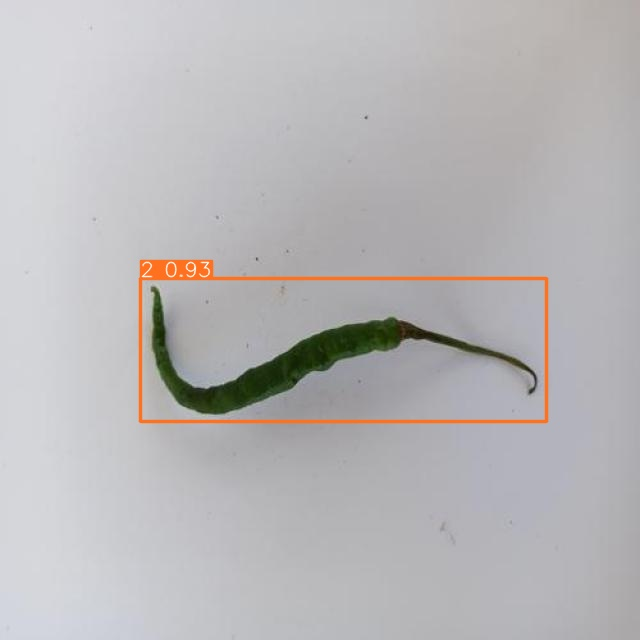

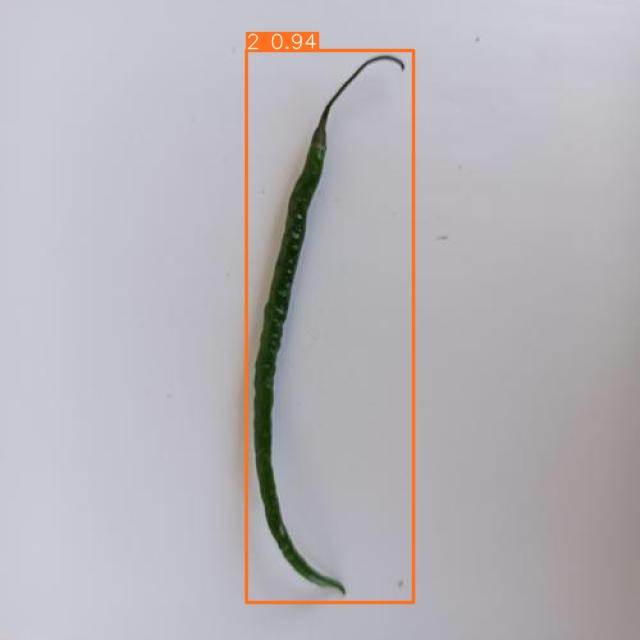

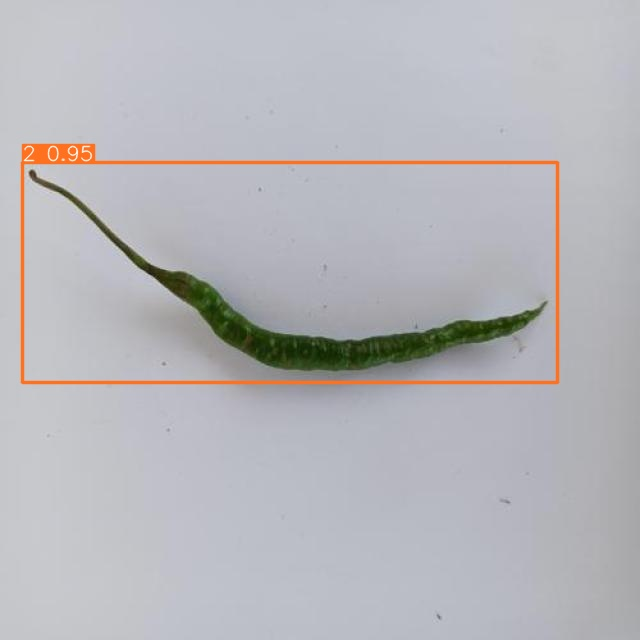

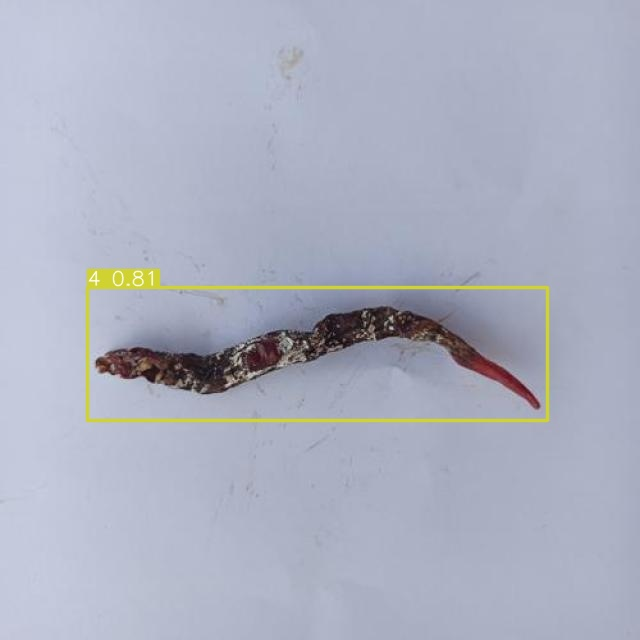

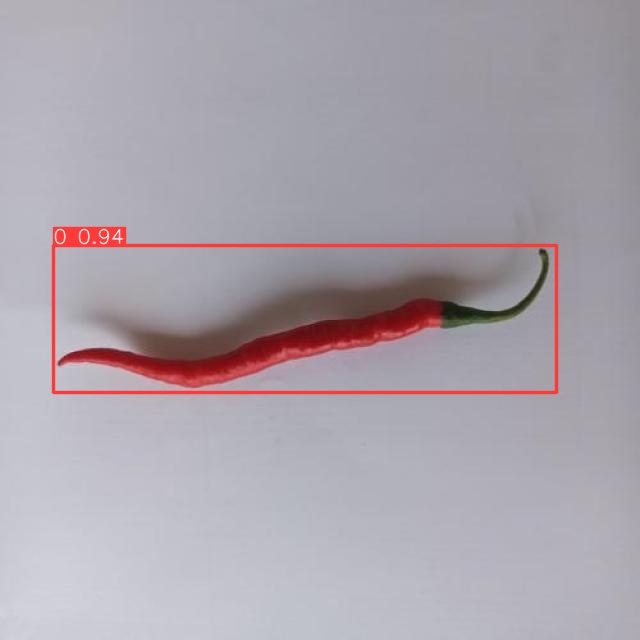

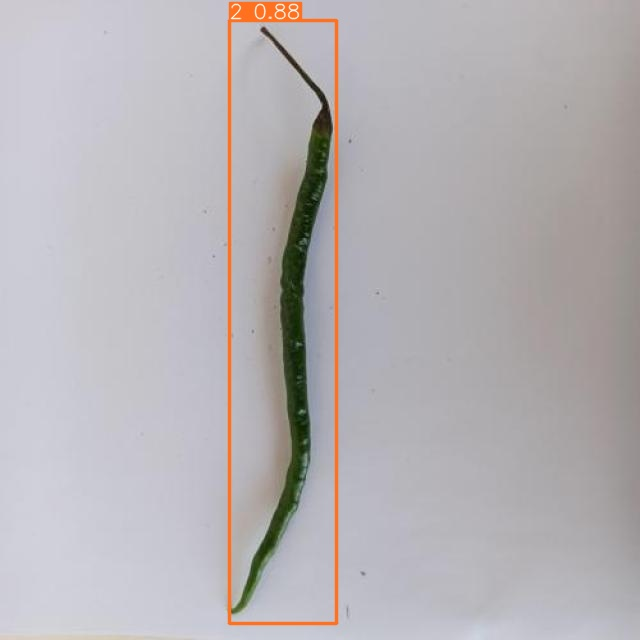

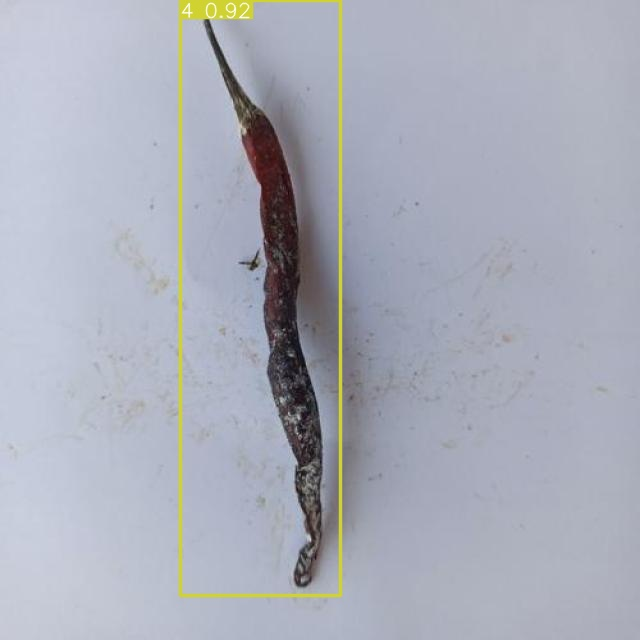

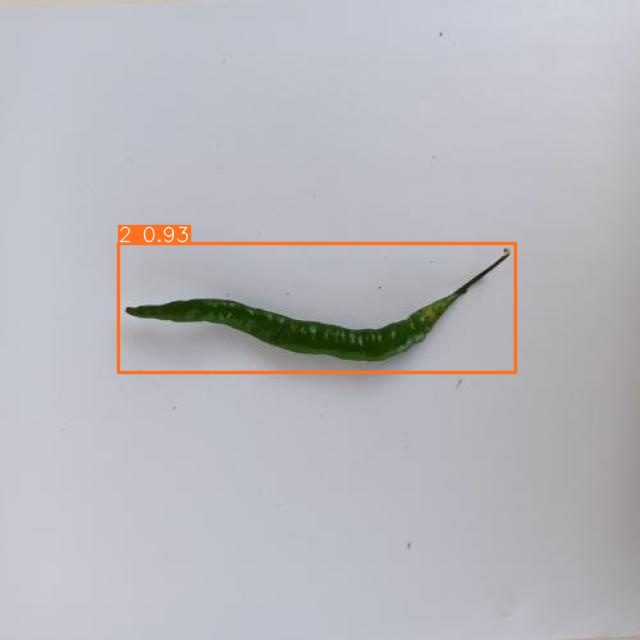

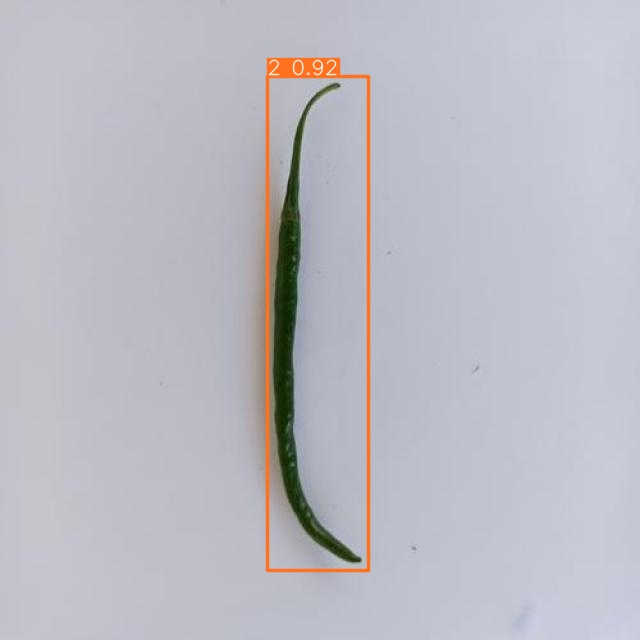

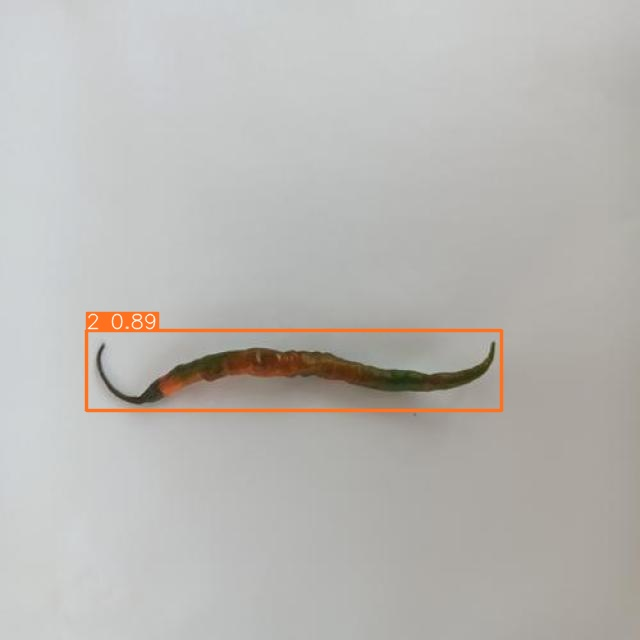

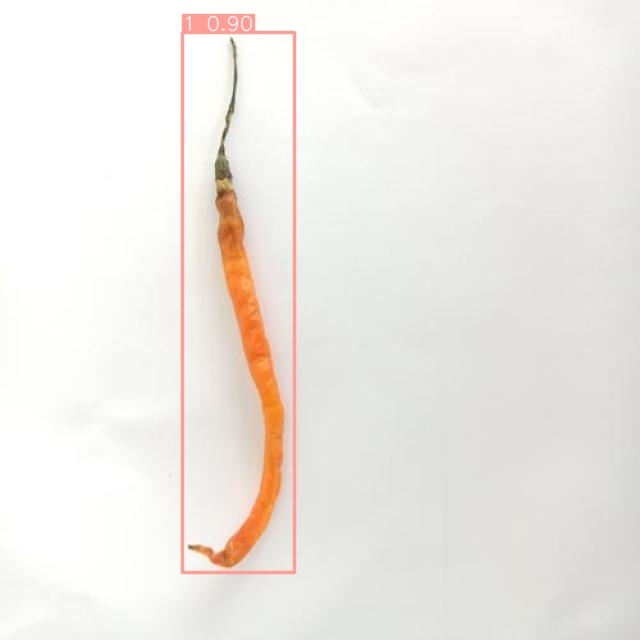

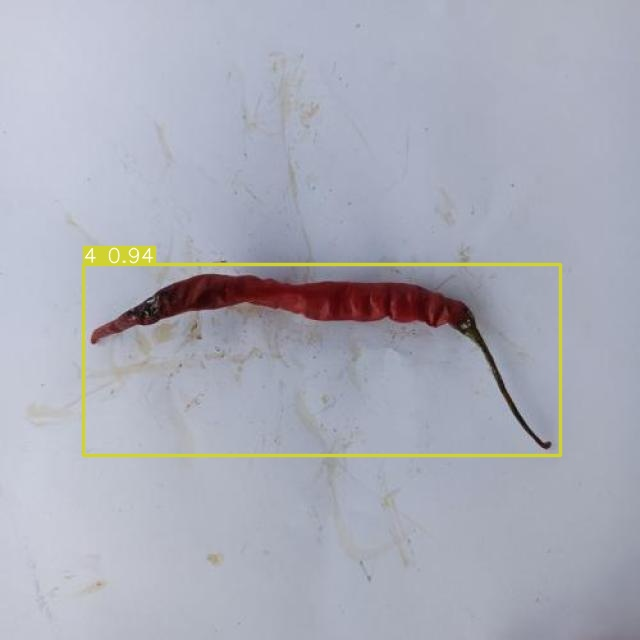

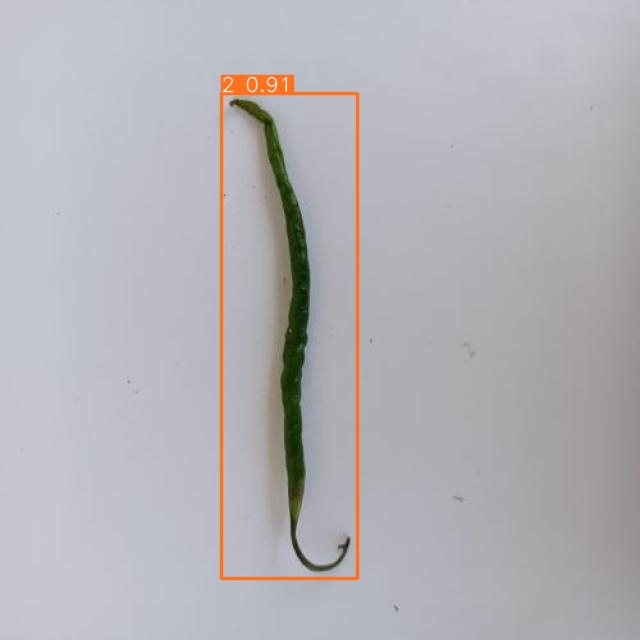

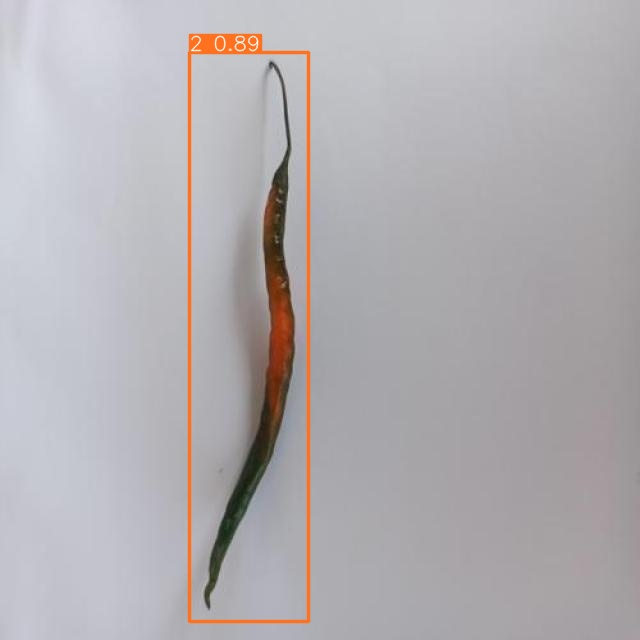

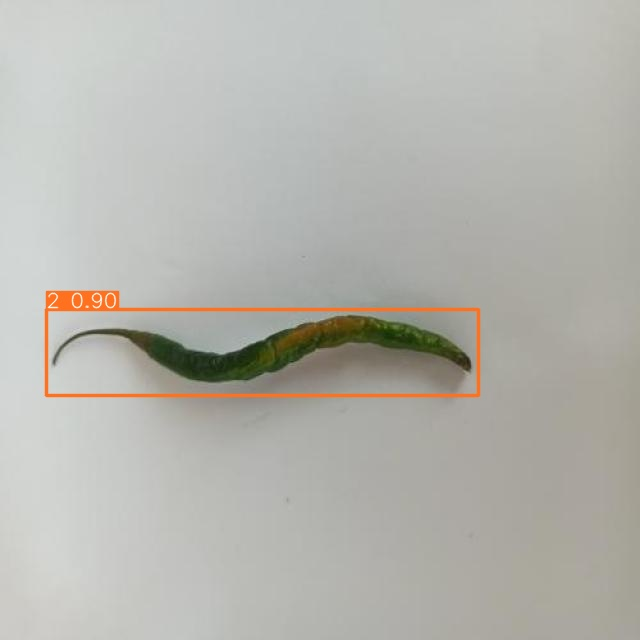

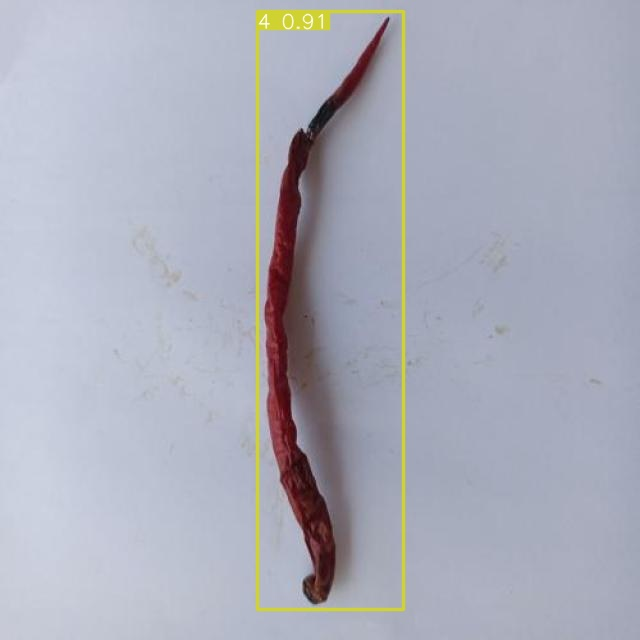

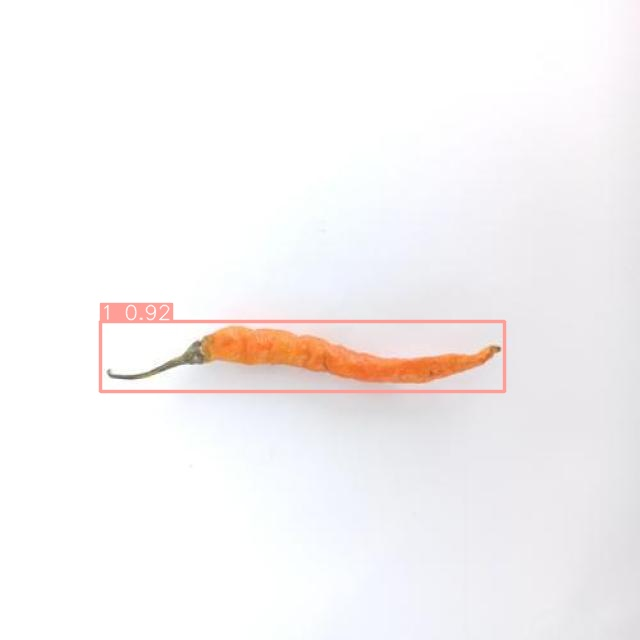

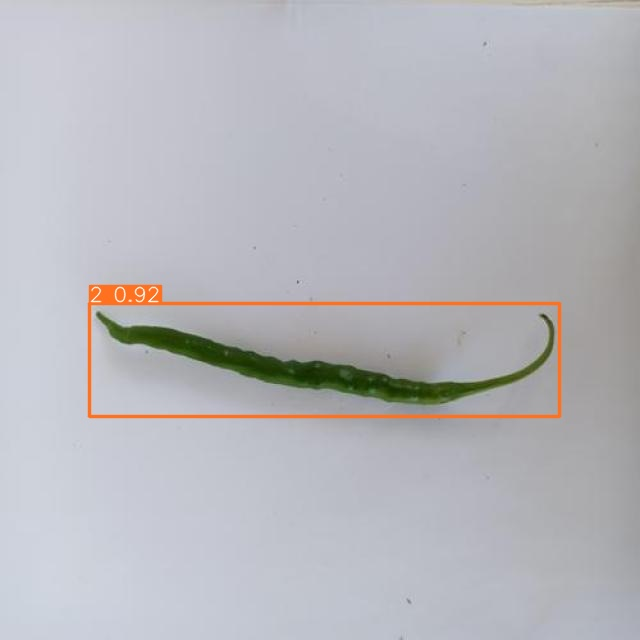

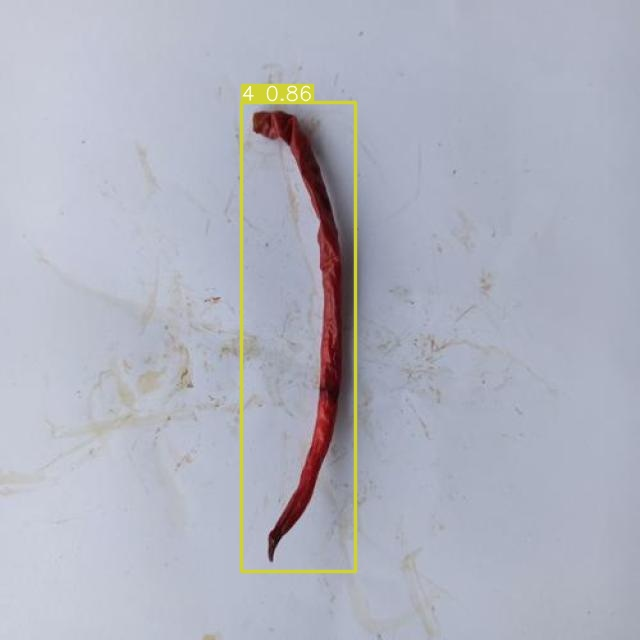

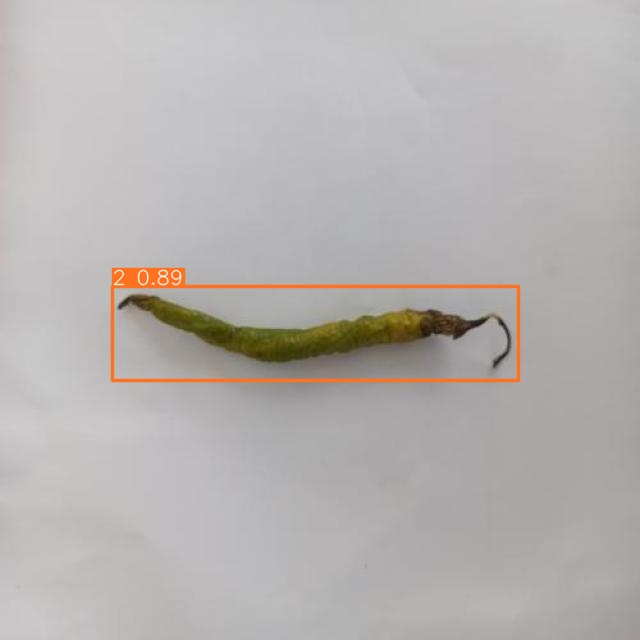

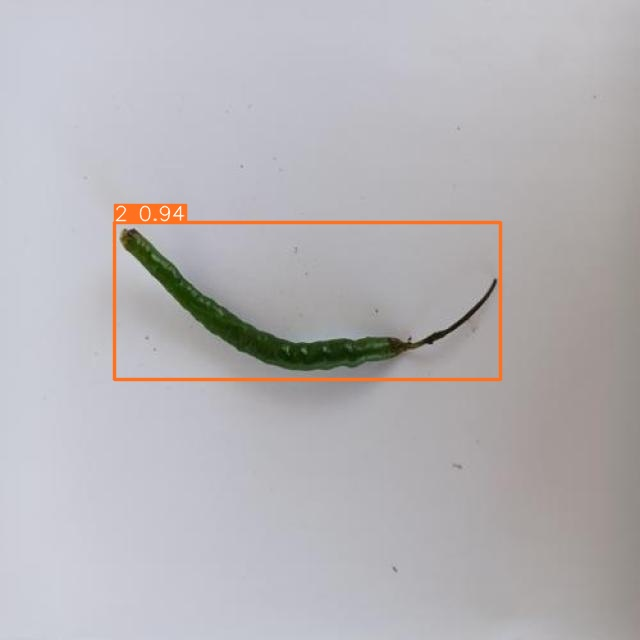

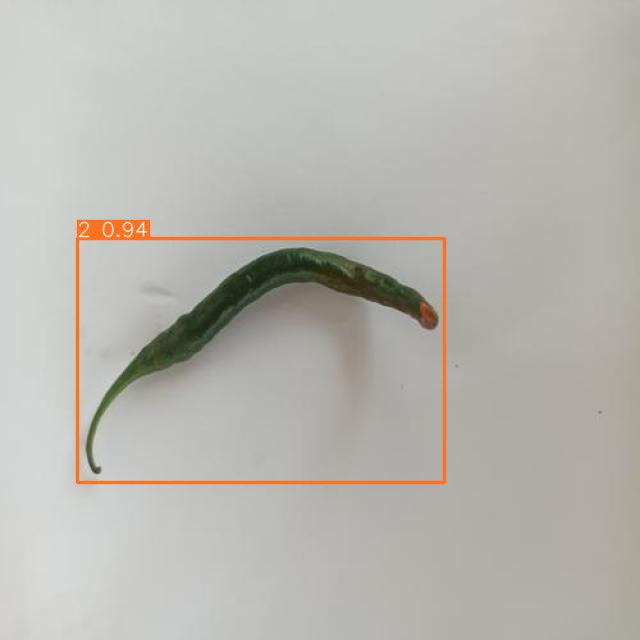

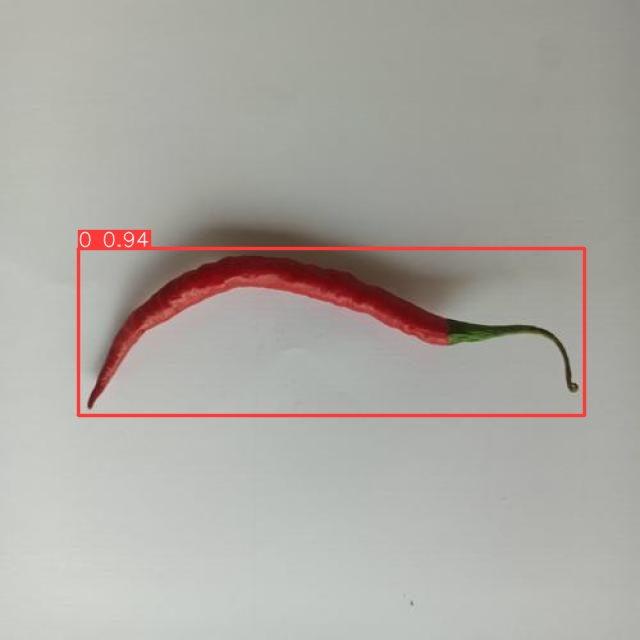

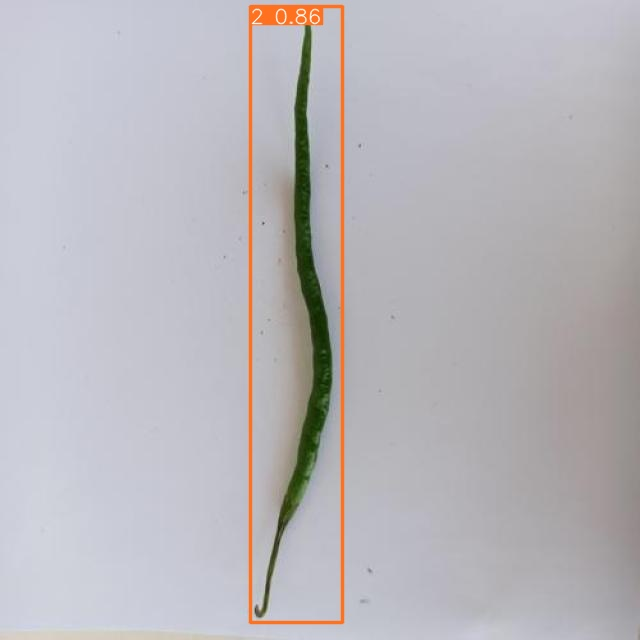

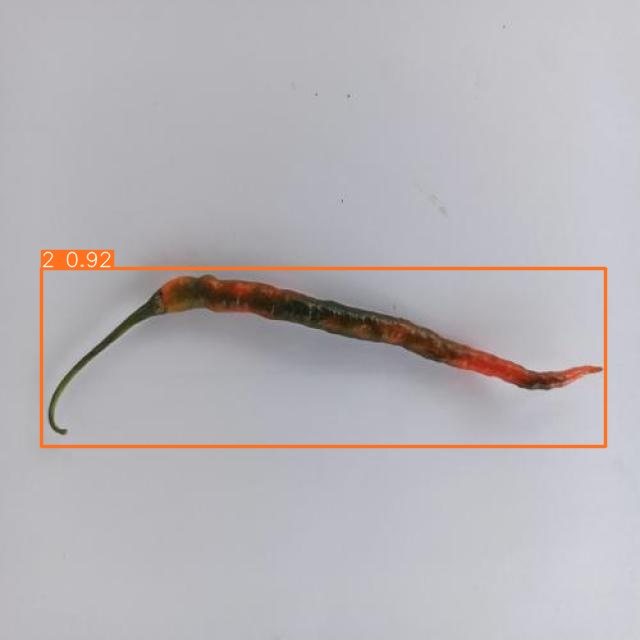

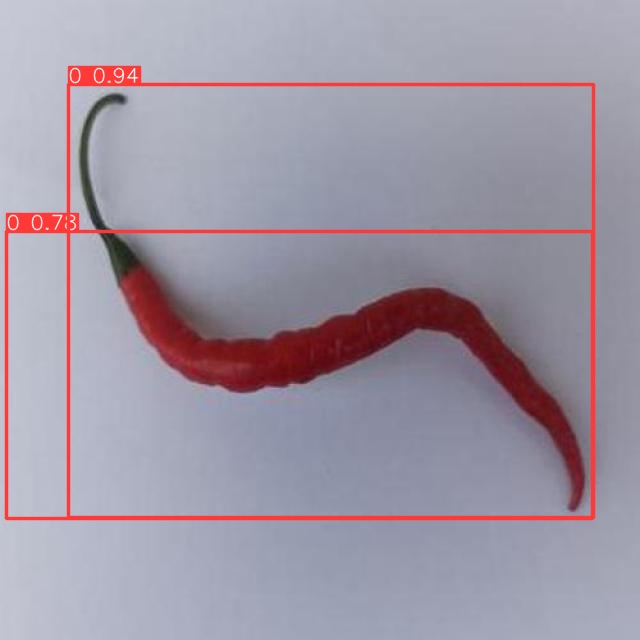

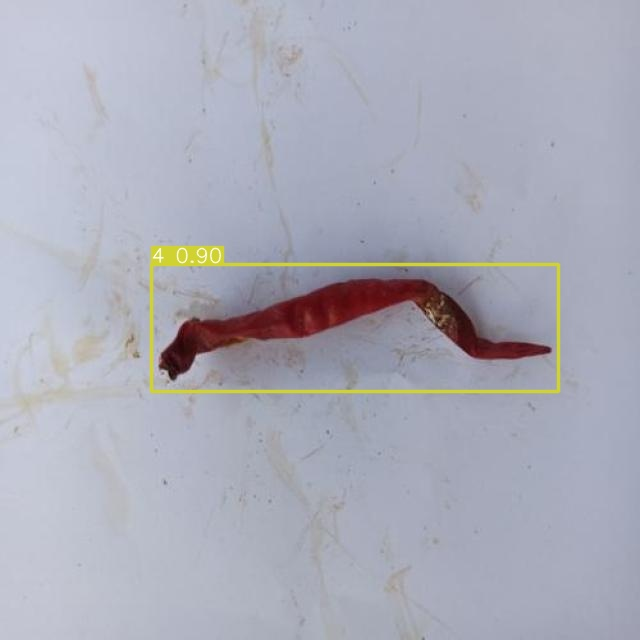

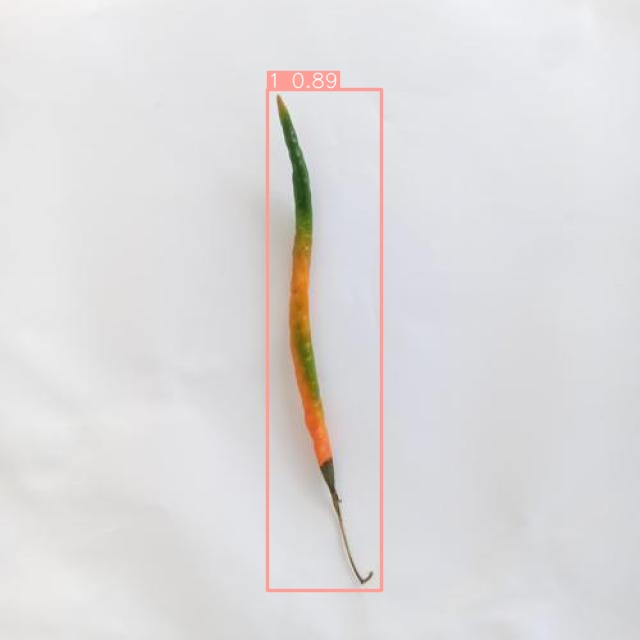

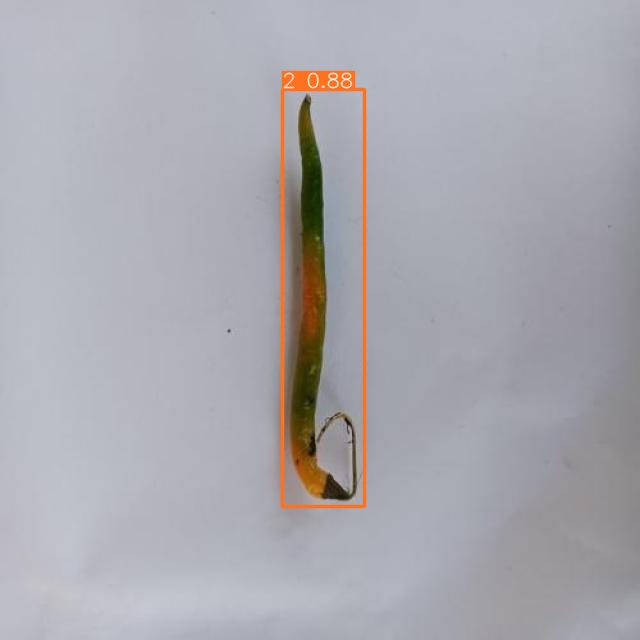

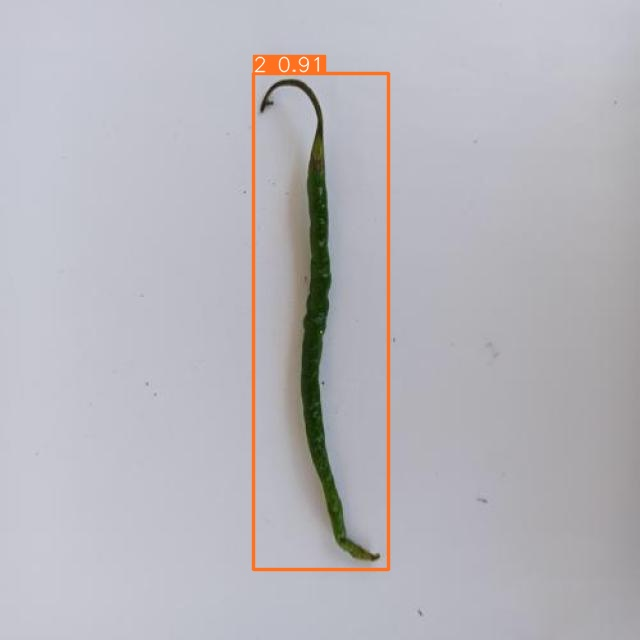

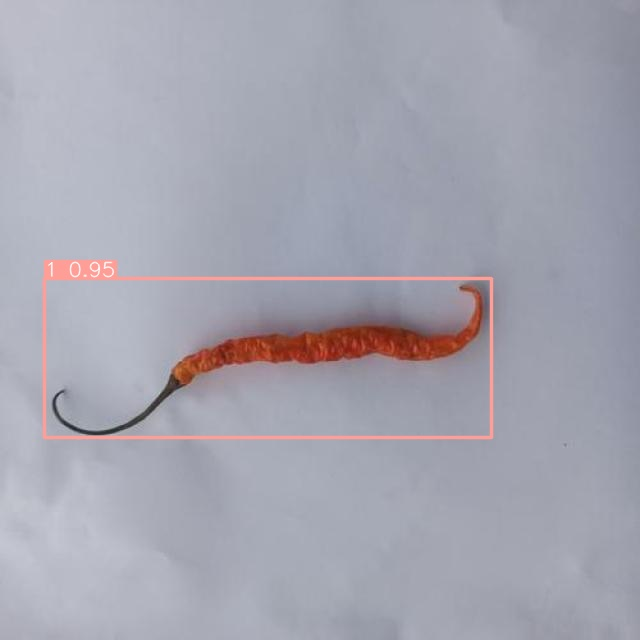

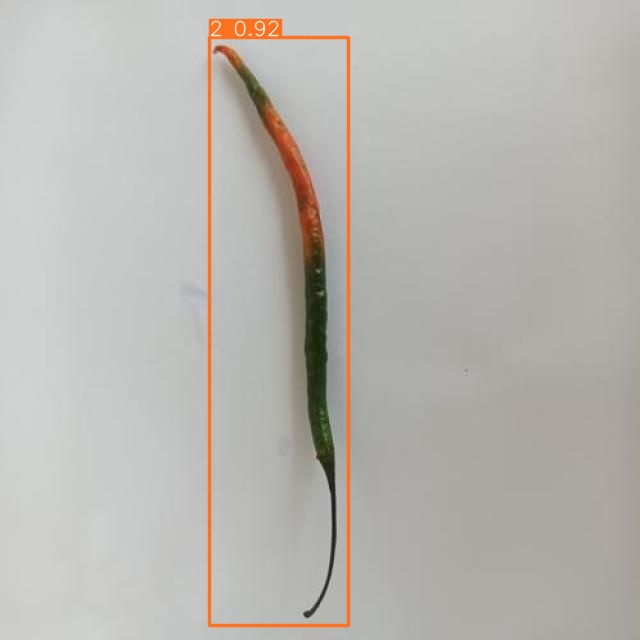

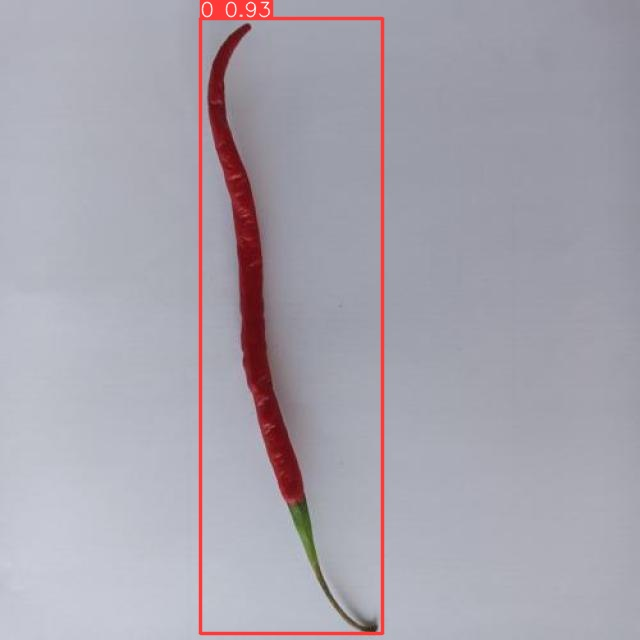

In [ ]:
import glob

from IPython.display import Image, display

for image_path in glob.glob(f'/content/runs/detect/predict/*.jpg'):
  display(Image(filename=image_path, height=600))
  print("\n")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import shutil

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Define the source and destination paths
source_folder = '/content/runs/detect/train/weights/last.pt'  # Replace 'your_source_folder' with the path to your folder in Colab content
destination_folder = '/content/drive/MyDrive/Pavan/'  # Replace 'your_destination_folder' with the desired path in your Drive

# Copy the folder from Colab content to Drive
shutil.copy(source_folder, destination_folder)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


'/content/drive/MyDrive/Pavan/last.pt'